<a href="https://colab.research.google.com/github/currencyfxjle/An-lisis-Causal-y-Predictivo-Utilizando-Regresi-n/blob/main/An%C3%A1lisis_Causal_y_Predictivo_Utilizando_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel("/content/tec_.xlsx", engine='openpyxl')

# Display the first few rows of the DataFrame
print(df.head())

   AA  Delta  United  Days from Purchase to Travel  Business  First Class  \
0   0      1       0                            47         1            0   
1   1      0       0                            88         0            0   
2   0      0       1                            31         0            0   
3   1      0       0                            38         0            1   
4   0      0       0                            46         0            1   

   Origin  Ticket Price  Lunes  Martes  Miércoles  Jueves  Viernes  Sábado  \
0       0           409      0       0          0       0        0       0   
1       0           420      0       0          0       0        0       0   
2       0           440      0       0          0       0        0       0   
3       0           613      0       0          0       0        0       0   
4       0           301      0       0          0       0        0       0   

   Trips Type of Traveler  Infrequent  Frequent  Extreme  
0      5 

In [ ]:
df.columns

Index(['AA', 'Delta', 'United', 'Days from Purchase to Travel', 'Business',
       'First Class', 'Origin', 'Ticket Price', 'Lunes', 'Martes', 'Miércoles',
       'Jueves', 'Viernes', 'Sábado', 'Trips', 'Type of Traveler',
       'Infrequent', 'Frequent', 'Extreme'],
      dtype='object')

In [ ]:
df.shape

(108, 19)

In [ ]:
df.dtypes

AA                               int64
Delta                            int64
United                           int64
Days from Purchase to Travel     int64
Business                         int64
First Class                      int64
Origin                           int64
Ticket Price                     int64
Lunes                            int64
Martes                           int64
Miércoles                        int64
Jueves                           int64
Viernes                          int64
Sábado                           int64
Trips                            int64
Type of Traveler                object
Infrequent                       int64
Frequent                         int64
Extreme                          int64
dtype: object

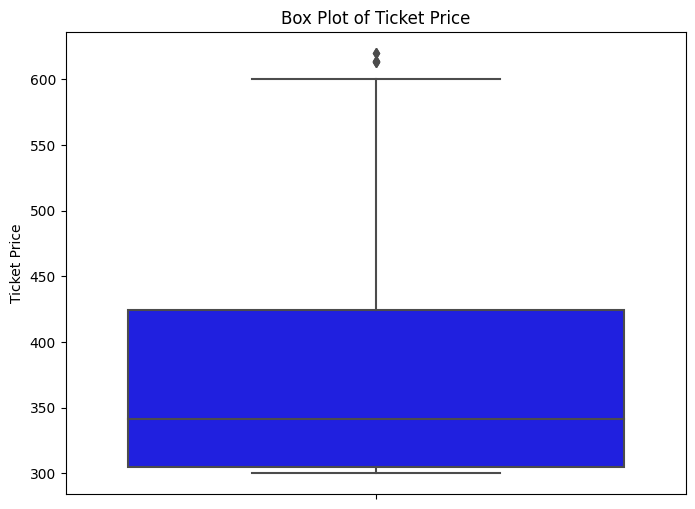

In [ ]:
# Box plot for Ticket Price
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Ticket Price'], color='blue')
plt.ylabel('Ticket Price')
plt.title('Box Plot of Ticket Price')
plt.show()


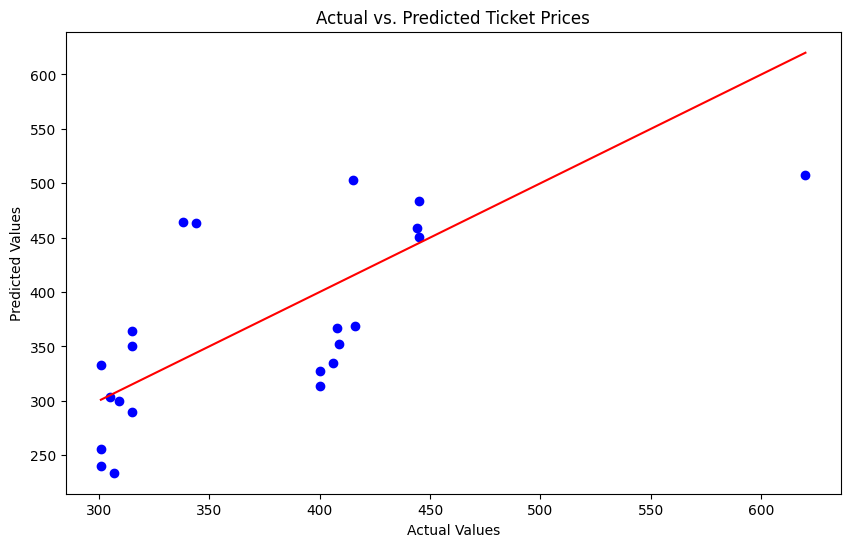

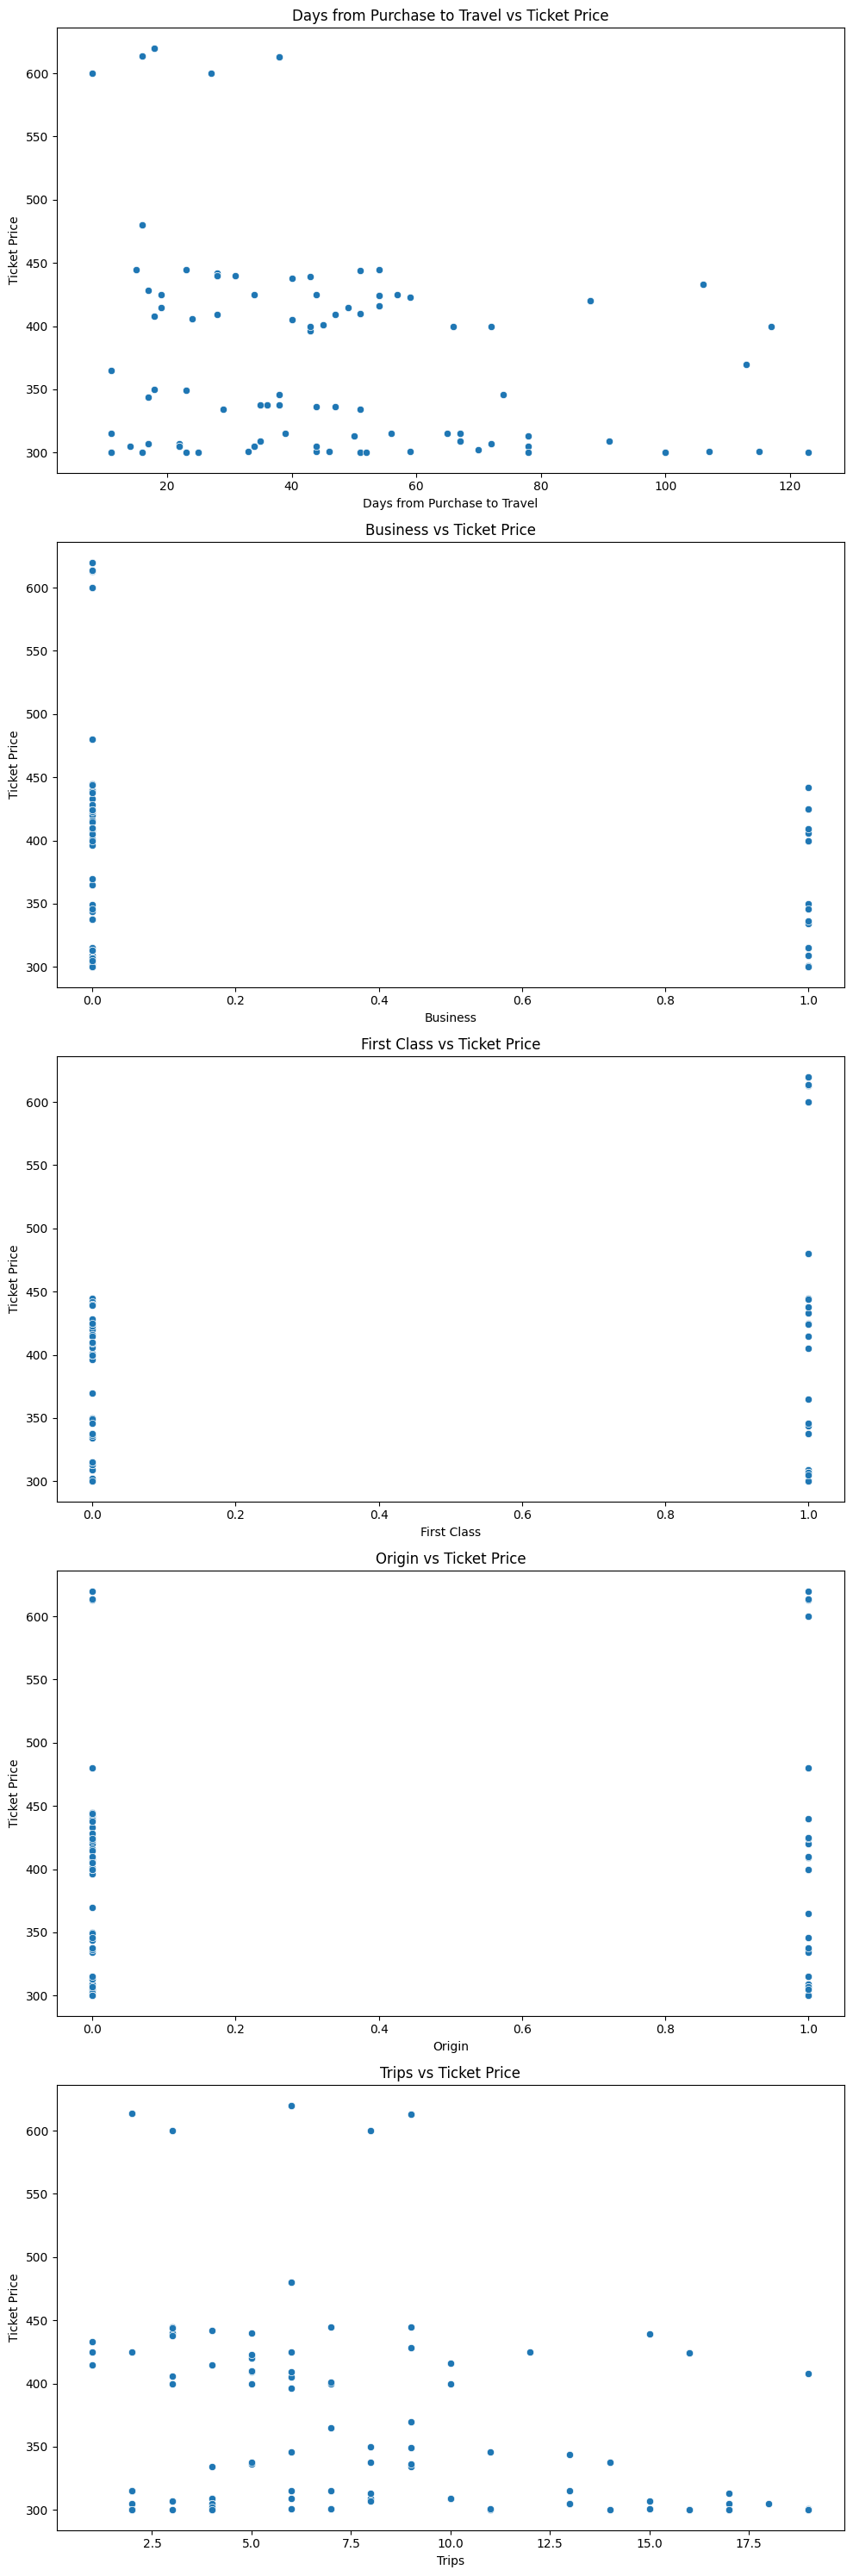

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           Ticket Price   R-squared:                       0.676
 Model:                            OLS   Adj. R-squared:                  0.595
 Method:                 Least Squares   F-statistic:                     8.347
 Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.00e-11
 Time:                        08:25:11   Log-Likelihood:                -459.13
 No. Observations:                  86   AIC:                             954.3
 Df Residuals:                      68   BIC:                             998.4
 Df Model:                          17                                         
 Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------

In [ ]:
# Full code with required imports and adjustments

# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your data is loaded into a dataframe named 'df'

# One-hot encoding the 'Type of Traveler' column (if it's present in the dataset)
if 'Type of Traveler' in df.columns:
    df = pd.get_dummies(df, columns=['Type of Traveler'], drop_first=True)

# Splitting the data
X = df.drop('Ticket Price', axis=1)
y = df['Ticket Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
if len(y_test) > 1:  # Ensure we have more than one sample in test set before computing R2 score
    r2 = r2_score(y_test, y_pred)
else:
    r2 = "Undefined (Less than two samples)"

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Ticket Prices')
plt.show()

# Visualizing relationships for a subset of features
selected_features = ['Days from Purchase to Travel', 'Business', 'First Class', 'Origin', 'Trips']
fig, axes = plt.subplots(nrows=len(selected_features), ncols=1, figsize=(10, 6 * len(selected_features)))
for i, feature in enumerate(selected_features):
    sns.scatterplot(data=df, x=feature, y='Ticket Price', ax=axes[i])
    axes[i].set_title(f'{feature} vs Ticket Price')
plt.tight_layout()
plt.show()

# Deep statistical analysis
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_summary = model_sm.summary()

# Testing for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

model_summary, vif_data, r2


In [ ]:
# Full code with required imports and adjustments

# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your data is loaded into a dataframe named 'df'

# One-hot encoding the 'Type of Traveler' column (if it's present in the dataset)
if 'Type of Traveler' in df.columns:
    df = pd.get_dummies(df, columns=['Type of Traveler'], drop_first=True)

# Splitting the data
X = df.drop('Ticket Price', axis=1)
y = df['Ticket Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
if len(y_test) > 1:  # Ensure we have more than one sample in test set before computing R2 score
    r2 = r2_score(y_test, y_pred)
else:
    r2 = "Undefined (Less than two samples)"

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Ticket Prices')
plt.show()

# Visualizing relationships for a subset of features
selected_features = ['Days from Purchase to Travel', 'Trips']
fig, axes = plt.subplots(nrows=len(selected_features), ncols=1, figsize=(10, 6 * len(selected_features)))
for i, feature in enumerate(selected_features):
    sns.scatterplot(data=df, x=feature, y='Ticket Price', ax=axes[i])
    axes[i].set_title(f'{feature} vs Ticket Price')
plt.tight_layout()
plt.show()

# Deep statistical analysis
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_summary = model_sm.summary()

# Testing for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

model_summary, vif_data, r2

NameError: ignored

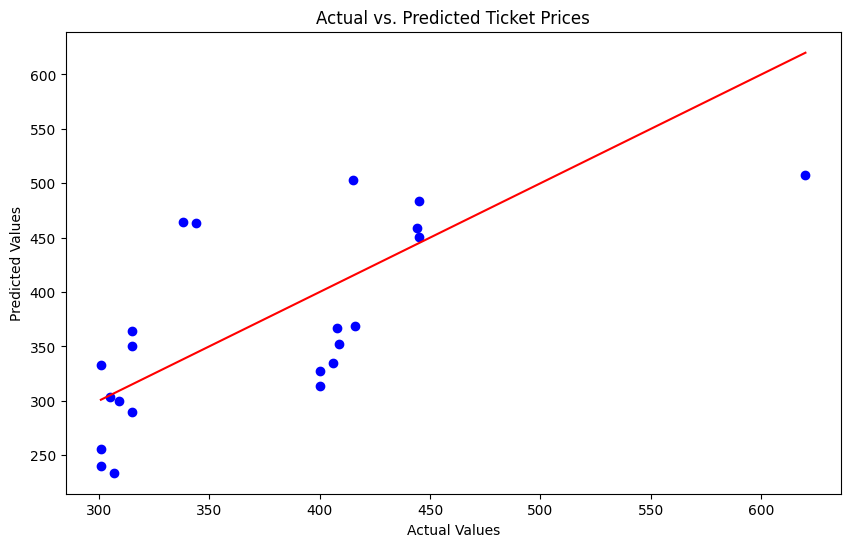

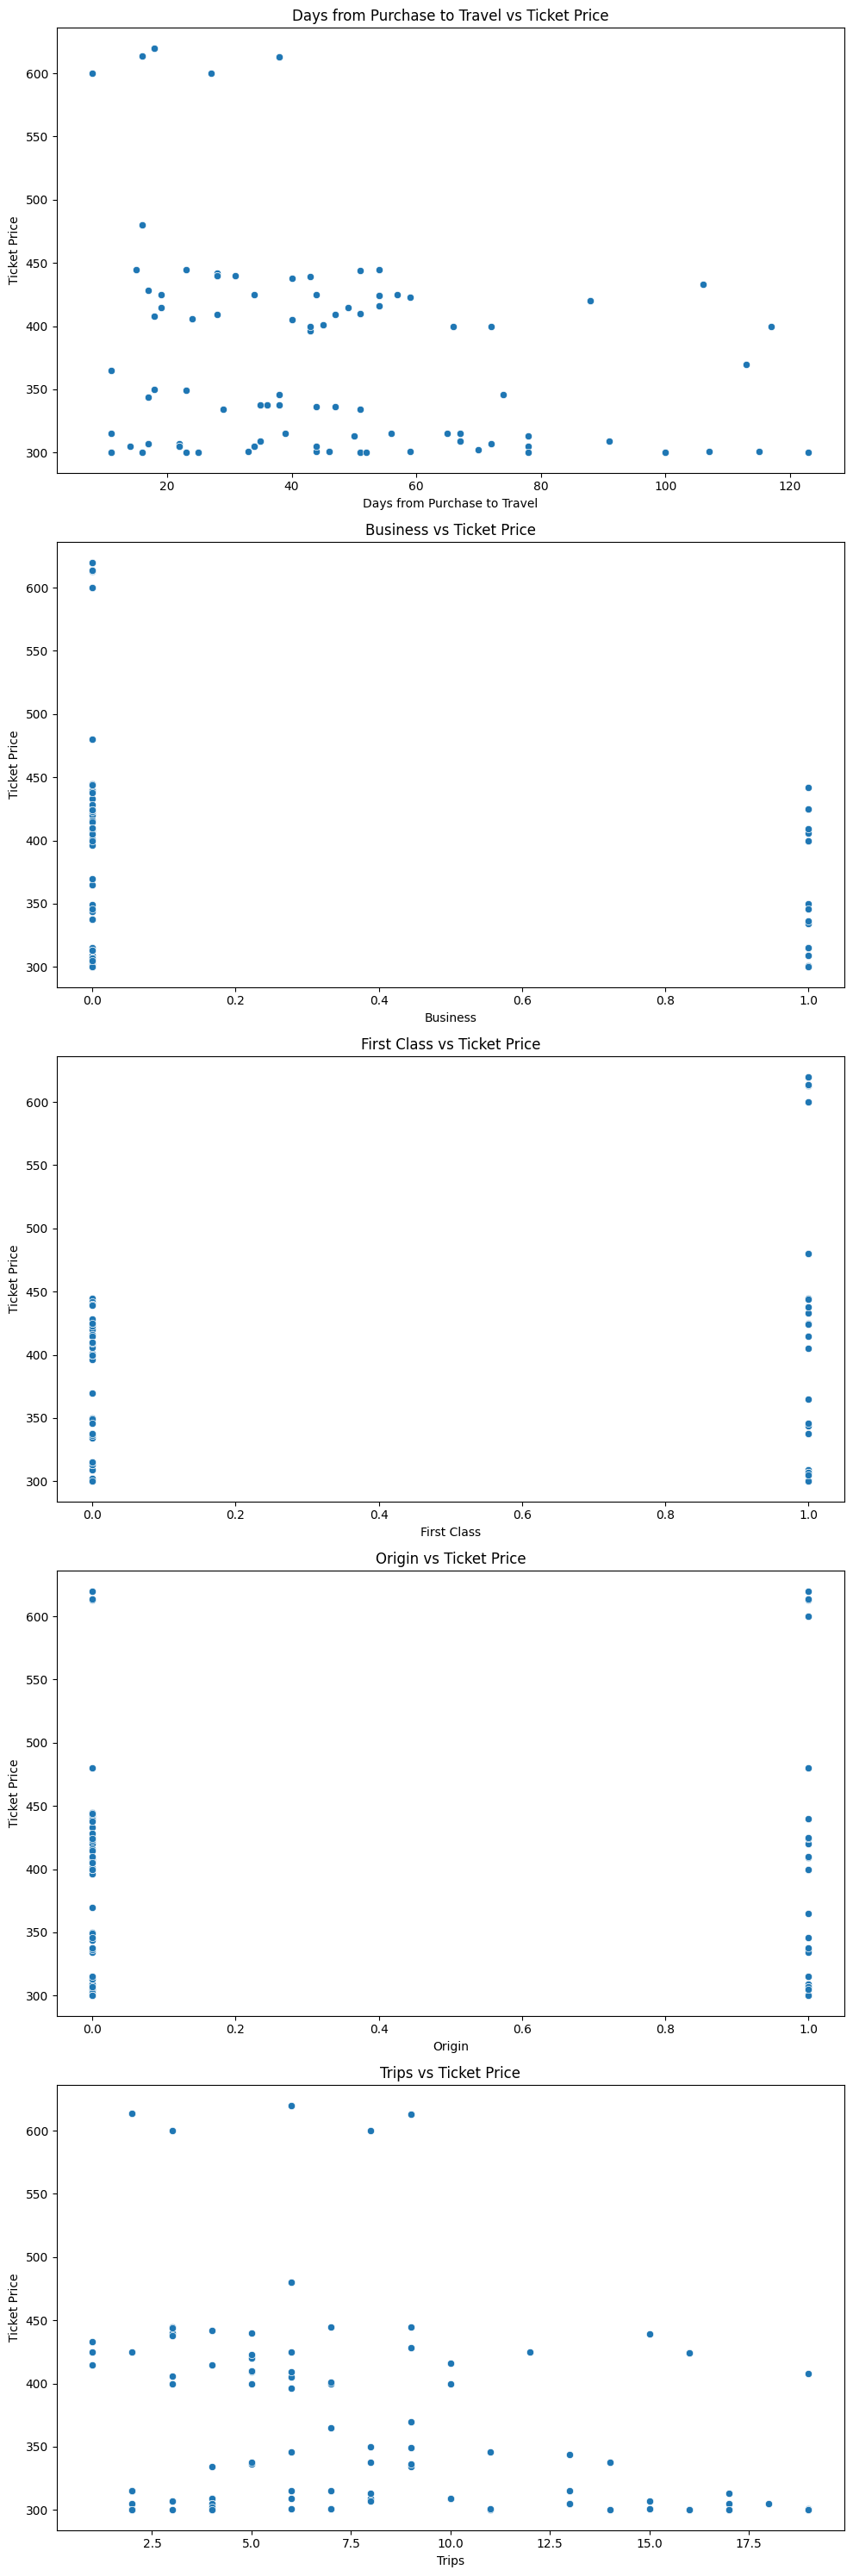

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


(0.2547212098197077,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           Ticket Price   R-squared:                       0.676
 Model:                            OLS   Adj. R-squared:                  0.595
 Method:                 Least Squares   F-statistic:                     8.347
 Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.00e-11
 Time:                        18:50:26   Log-Likelihood:                -459.13
 No. Observations:                  86   AIC:                             954.3
 Df Residuals:                      68   BIC:                             998.4
 Df Model:                          17                                         
 Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------

In [ ]:
# Full code with required imports and adjustments

# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your data is loaded into a dataframe named 'df'

# One-hot encoding the 'Type of Traveler' column (if it's present in the dataset)
if 'Type of Traveler' in df.columns:
    df = pd.get_dummies(df, columns=['Type of Traveler'], drop_first=True)

# Splitting the data
X = df.drop('Ticket Price', axis=1)
y = df['Ticket Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
if len(y_test) > 1:  # Ensure we have more than one sample in test set before computing R2 score
    r2 = r2_score(y_test, y_pred)
else:
    r2 = "Undefined (Less than two samples)"

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Ticket Prices')
plt.show()

# Visualizing relationships for a subset of features
selected_features = ['Days from Purchase to Travel', 'Business', 'First Class', 'Origin', 'Trips']
fig, axes = plt.subplots(nrows=len(selected_features), ncols=1, figsize=(10, 6 * len(selected_features)))
for i, feature in enumerate(selected_features):
    sns.scatterplot(data=df, x=feature, y='Ticket Price', ax=axes[i])
    axes[i].set_title(f'{feature} vs Ticket Price')
plt.tight_layout()
plt.show()

# Deep statistical analysis
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_summary = model_sm.summary()

# Testing for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Include VIF results and model evaluation metrics in the final output
r2, model_summary, vif_data, mae, mse


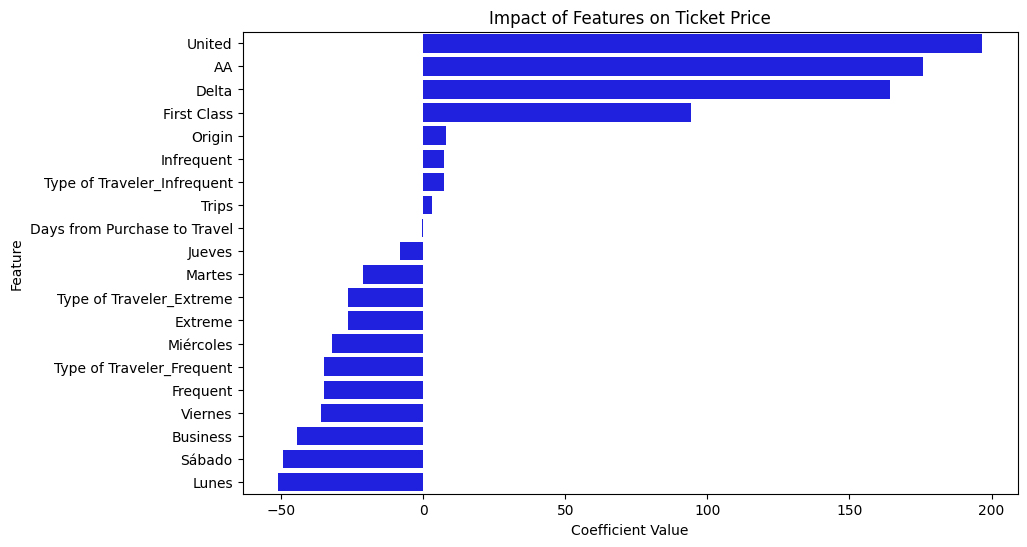

In [ ]:
# Coefficients and their impact
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Impact of Features on Ticket Price')
plt.show()


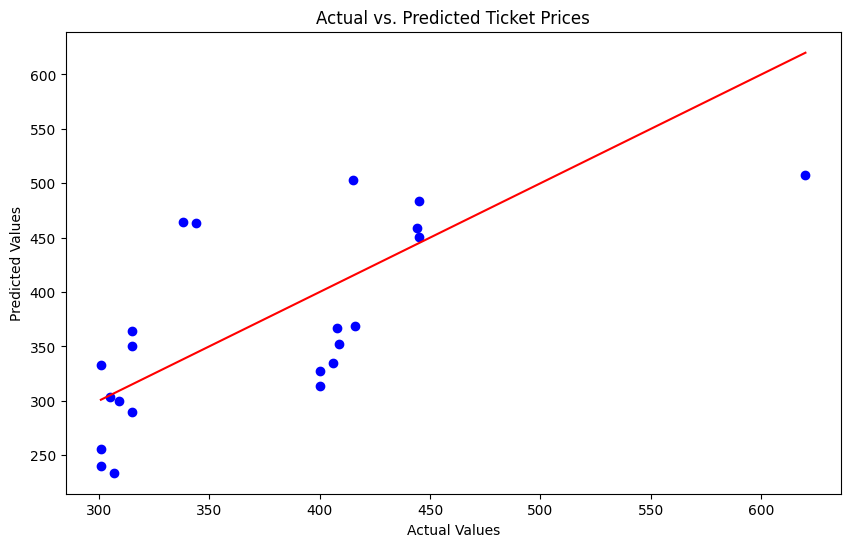

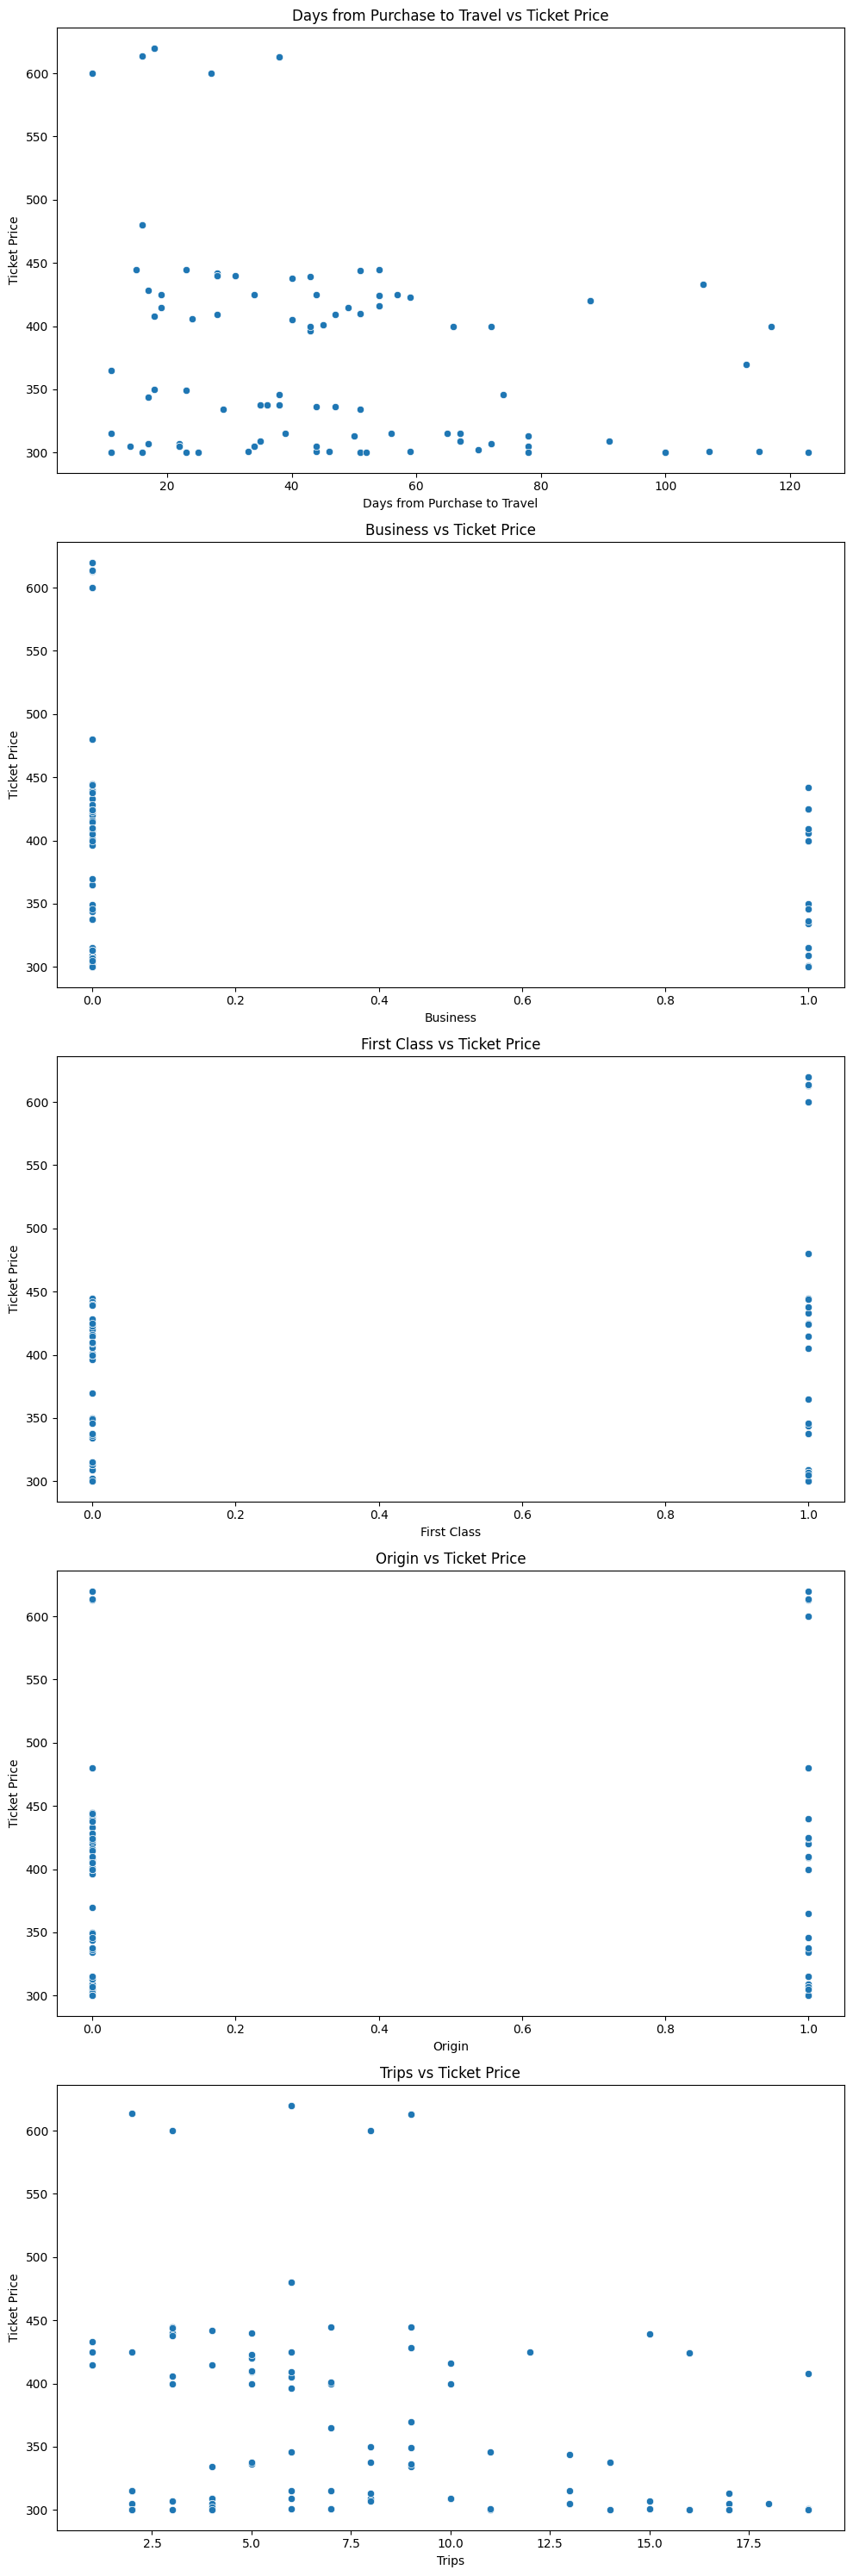

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           Ticket Price   R-squared:                       0.676
 Model:                            OLS   Adj. R-squared:                  0.595
 Method:                 Least Squares   F-statistic:                     8.347
 Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.00e-11
 Time:                        18:53:39   Log-Likelihood:                -459.13
 No. Observations:                  86   AIC:                             954.3
 Df Residuals:                      68   BIC:                             998.4
 Df Model:                          17                                         
 Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------

In [ ]:
# Importing necessary libraries for the analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# One-hot encoding the 'Type of Traveler' column (if it's present in the dataset)
if 'Type of Traveler' in df.columns:
    df = pd.get_dummies(df, columns=['Type of Traveler'], drop_first=True)

# Splitting the data
X = df.drop('Ticket Price', axis=1)
y = df['Ticket Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
if len(y_test) > 1:  # Ensure we have more than one sample in test set before computing R2 score
    r2 = r2_score(y_test, y_pred)
else:
    r2 = "Undefined (Less than two samples)"

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Ticket Prices')
plt.show()

# Visualizing relationships for a subset of features
selected_features = ['Days from Purchase to Travel', 'Business', 'First Class', 'Origin', 'Trips']
fig, axes = plt.subplots(nrows=len(selected_features), ncols=1, figsize=(10, 6 * len(selected_features)))
for i, feature in enumerate(selected_features):
    sns.scatterplot(data=df, x=feature, y='Ticket Price', ax=axes[i])
    axes[i].set_title(f'{feature} vs Ticket Price')
plt.tight_layout()
plt.show()

# Deep statistical analysis
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_summary = model_sm.summary()

# Testing for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

model_summary, vif_data, r2



In [ ]:
# Include VIF results in the final output
r2, model_summary, vif_data, mae, mse


(0.2547212098197077,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           Ticket Price   R-squared:                       0.676
 Model:                            OLS   Adj. R-squared:                  0.595
 Method:                 Least Squares   F-statistic:                     8.347
 Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.00e-11
 Time:                        06:06:51   Log-Likelihood:                -459.13
 No. Observations:                  86   AIC:                             954.3
 Df Residuals:                      68   BIC:                             998.4
 Df Model:                          17                                         
 Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------

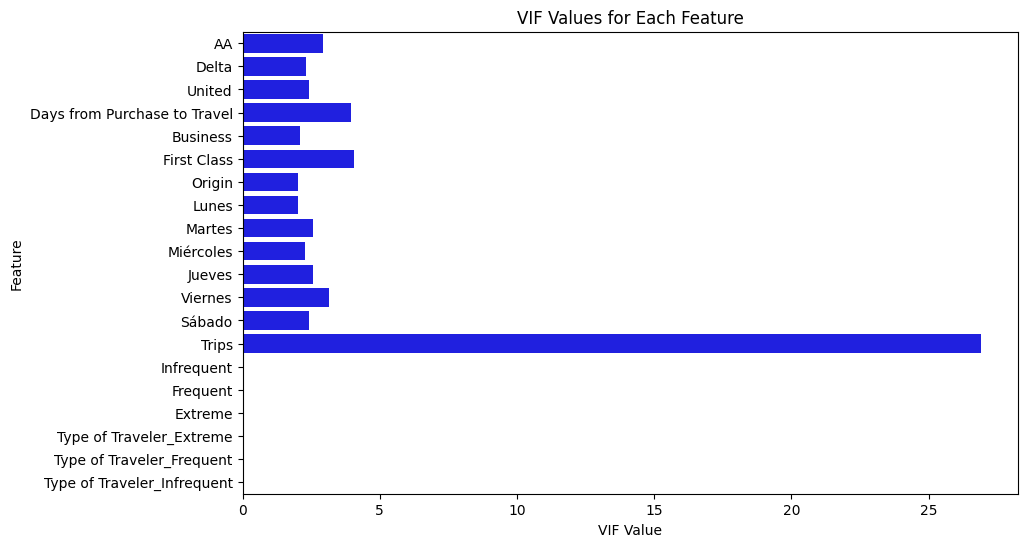

In [ ]:
# VIF visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data, color='blue')
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.title('VIF Values for Each Feature')
plt.show()


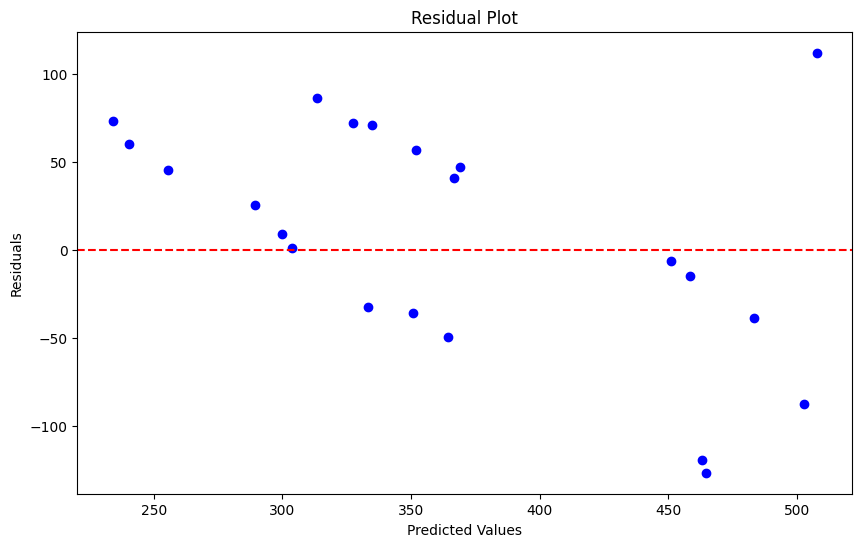

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


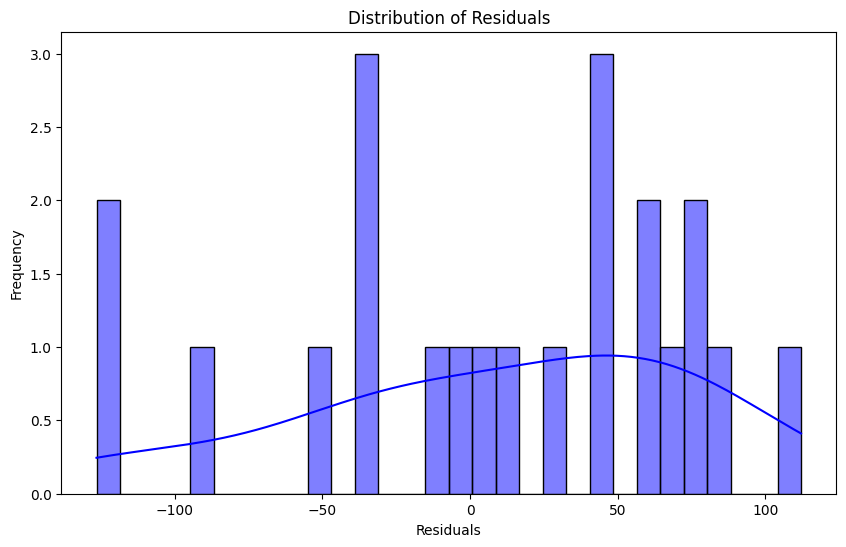

In [ ]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


In [ ]:
# Extract significant features based on p-values
significant_features = None
for table in model_summary.tables:
    if 'P>|t|' in table:
        significant_features = table[table['P>|t|'] < 0.05]
        break

# Check if significant_features is not None before using it
if significant_features is not None:
    print(significant_features)
else:
    print("No significant features found.")



No significant features found.


In [ ]:
# Deep statistical analysis with OLS regression
X_train_sm = sm.add_constant(X_train)  # Add a constant term (intercept) to the predictors
model_sm = sm.OLS(y_train, X_train_sm).fit()  # Fit the OLS regression model

# Get the summary of the OLS regression results
model_summary = model_sm.summary()

# Print the summary
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     8.347
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.00e-11
Time:                        09:51:28   Log-Likelihood:                -459.13
No. Observations:                  86   AIC:                             954.3
Df Residuals:                      68   BIC:                             998.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

p-value for Breusch-Pagan test: 0.0017251980963682544
p-value for White's test: 0.42157937111025984


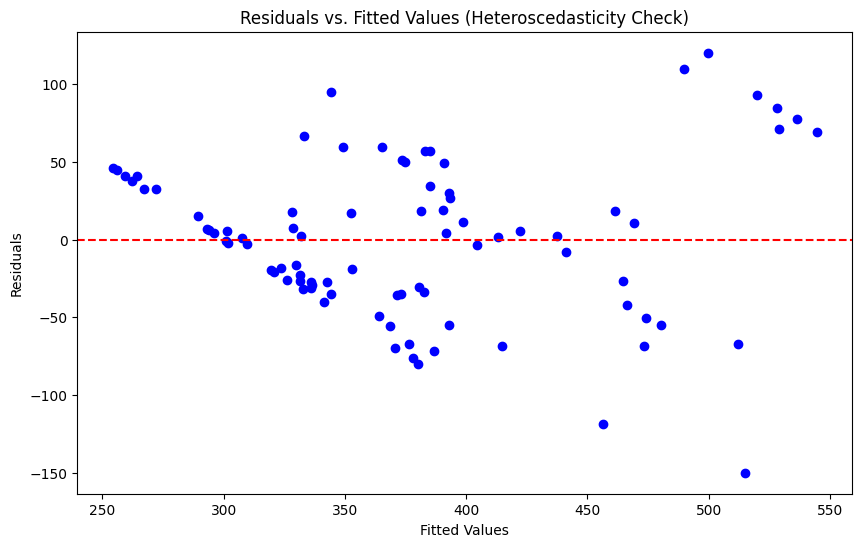

In [ ]:
# Breusch-Pagan Test for Heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
_, p_bp, _, _ = het_breuschpagan(model_sm.resid, X_train_sm)
print(f'p-value for Breusch-Pagan test: {p_bp}')

# White's Test for Heteroscedasticity
from statsmodels.stats.diagnostic import het_white

# Perform White's test
_, p_white, _, _ = het_white(model_sm.resid, X_train_sm)
print(f'p-value for White\'s test: {p_white}')

# Visualize Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
plt.scatter(model_sm.fittedvalues, model_sm.resid, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Heteroscedasticity Check)')
plt.show()


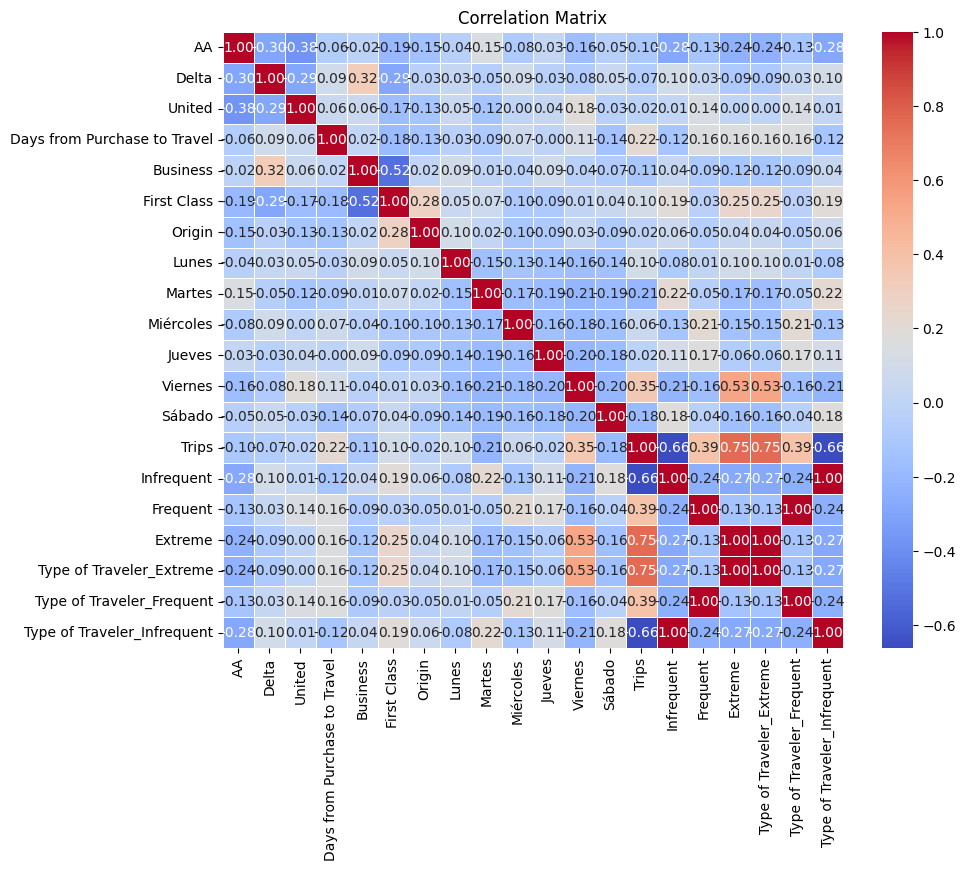

In [ ]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


explained_variance_ratio contains the explained variance ratio for each principal component.

We create a plot where the x-axis represents the principal components and the y-axis represents the explained variance ratio.
The scree plot helps you visually identify the "elbow point" where the explained variance starts to level off. You can use this point to decide how many principal components to retain based on your desired level of variance explanation.

By analyzing the scree plot, you can determine the optimal number of principal components to keep in your PCA analysis. Typically, you would retain enough components to capture a significant portion of the variance while reducing dimensionality.

In [ ]:
from sklearn.decomposition import PCA

# Fit PCA on your data
pca = PCA()
pca.fit(X_train)

# Check explained variance ratio to decide the number of components to retain
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [9.64322029e-01 3.23825888e-02 6.26106013e-04 4.44827696e-04
 3.68377154e-04 3.53366035e-04 3.11920572e-04 2.42217762e-04
 2.04964045e-04 1.76635825e-04 1.58439701e-04 1.31248905e-04
 1.02740294e-04 9.32939439e-05 4.09614677e-05 2.08264349e-05
 1.94559638e-05 6.47253628e-36 2.81817068e-36 1.02790661e-36]


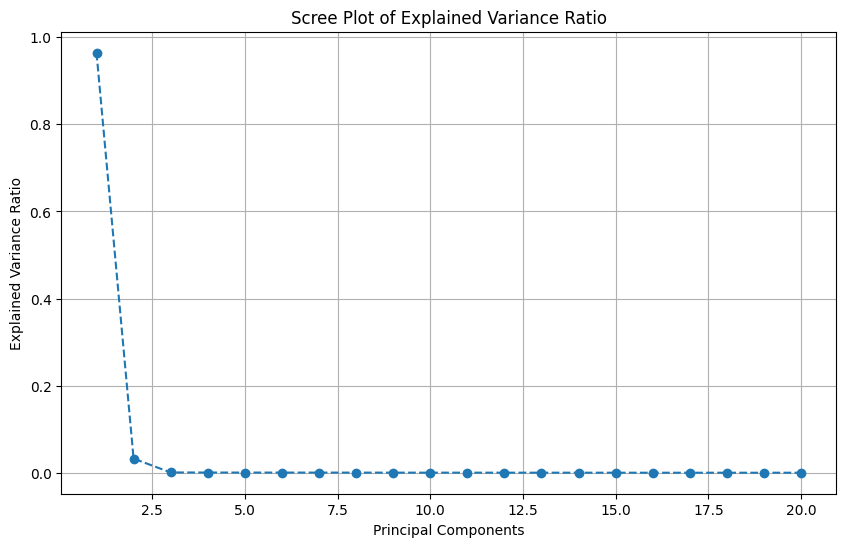

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA on your data
pca = PCA()
pca.fit(X_train)

# Check explained variance ratio to decide the number of components to retain
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot of Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


lasso_coefficients contains the coefficients assigned by the Lasso regression model to each predictor variable. These coefficients indicate the strength and direction (positive or negative) of the relationship between the predictor and the target variable.

selected_predictors contains the names of the predictors that were selected by Lasso (i.e., the predictors with non-zero coefficients). These are the variables that are considered important by the Lasso model.

In [ ]:
from sklearn.linear_model import Lasso

# Fit a Lasso regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Check the coefficients
lasso_coefficients = lasso_model.coef_

# Get the selected predictors
selected_predictors = X_train.columns[lasso_coefficients != 0]

# Print the selected predictors and their coefficients
print("Selected Predictors:", selected_predictors)
print("Lasso Coefficients:", lasso_coefficients)



Selected Predictors: Index(['AA', 'Delta', 'United', 'Days from Purchase to Travel', 'Business',
       'First Class', 'Origin', 'Lunes', 'Miércoles', 'Jueves', 'Viernes',
       'Sábado', 'Trips', 'Frequent'],
      dtype='object')
Lasso Coefficients: [150.53454356 124.69982486 156.87508791  -0.55538201 -32.54962257
  77.44082222   1.06653783 -12.97890042   0.          -1.85254411
   3.14457116  -1.80534081 -19.93438386  -2.4095298   -0.
 -16.82658755  -0.          -0.          -0.          -0.        ]


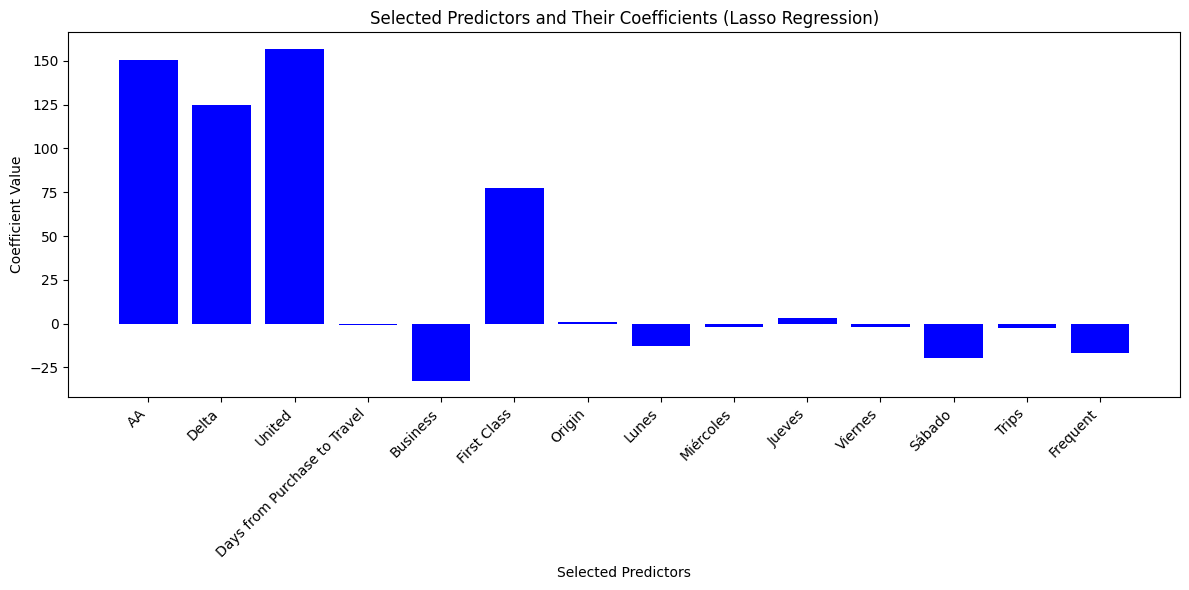

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fit a Lasso regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Get the selected predictors and their coefficients
lasso_coefficients = lasso_model.coef_
selected_predictors = X_train.columns[lasso_coefficients != 0]

# Create a bar plot of selected predictors and their coefficients
plt.figure(figsize=(12, 6))
plt.bar(selected_predictors, lasso_coefficients[lasso_coefficients != 0], color='blue')
plt.xlabel('Selected Predictors')
plt.ylabel('Coefficient Value')
plt.title('Selected Predictors and Their Coefficients (Lasso Regression)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [VIF(X_train.values, i) for i in range(X_train.shape[1])]

# Print the VIF values
print(vif_data)


                         Feature        VIF
0                             AA   2.934878
1                          Delta   2.317800
2                         United   2.418869
3   Days from Purchase to Travel   3.962431
4                       Business   2.076868
5                    First Class   4.047931
6                         Origin   2.009350
7                          Lunes   2.005546
8                         Martes   2.560049
9                      Miércoles   2.259223
10                        Jueves   2.574566
11                       Viernes   3.158695
12                        Sábado   2.429361
13                         Trips  26.895099
14                    Infrequent        inf
15                      Frequent        inf
16                       Extreme        inf
17      Type of Traveler_Extreme        inf
18     Type of Traveler_Frequent        inf
19   Type of Traveler_Infrequent        inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize a dictionary to store R-squared values for each predictor
rsquared_dict = {}

# Iterate through each predictor
for predictor in X_train.columns:
    # Fit a linear regression model for the current predictor vs. Ticket Price
    lm = LinearRegression()
    lm.fit(X_train[[predictor]], y_train)

    # Calculate R-squared for the model
    r_squared = lm.score(X_train[[predictor]], y_train)

    # Store the R-squared value in the dictionary
    rsquared_dict[predictor] = r_squared

# Calculate the VIF for each predictor using VIF = 1 / (1 - R-squared)
vif_dict = {predictor: 1 / (1 - r_squared) for predictor, r_squared in rsquared_dict.items()}

# Convert the dictionary to a DataFrame and sort it by VIF values in descending order
vif_data = pd.DataFrame.from_dict(vif_dict, orient='index', columns=['VIF'])
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Print the sorted VIF values
print(vif_data_sorted)


                                   VIF
AA                            1.089776
United                        1.075484
Trips                         1.071103
Days from Purchase to Travel  1.055886
Type of Traveler_Extreme      1.054038
Extreme                       1.054038
Business                      1.033500
Type of Traveler_Frequent     1.020528
Frequent                      1.020528
First Class                   1.013492
Miércoles                     1.010961
Martes                        1.008062
Viernes                       1.006877
Delta                         1.004167
Sábado                        1.003855
Origin                        1.002521
Lunes                         1.002337
Jueves                        1.001570
Infrequent                    1.000903
Type of Traveler_Infrequent   1.000903


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


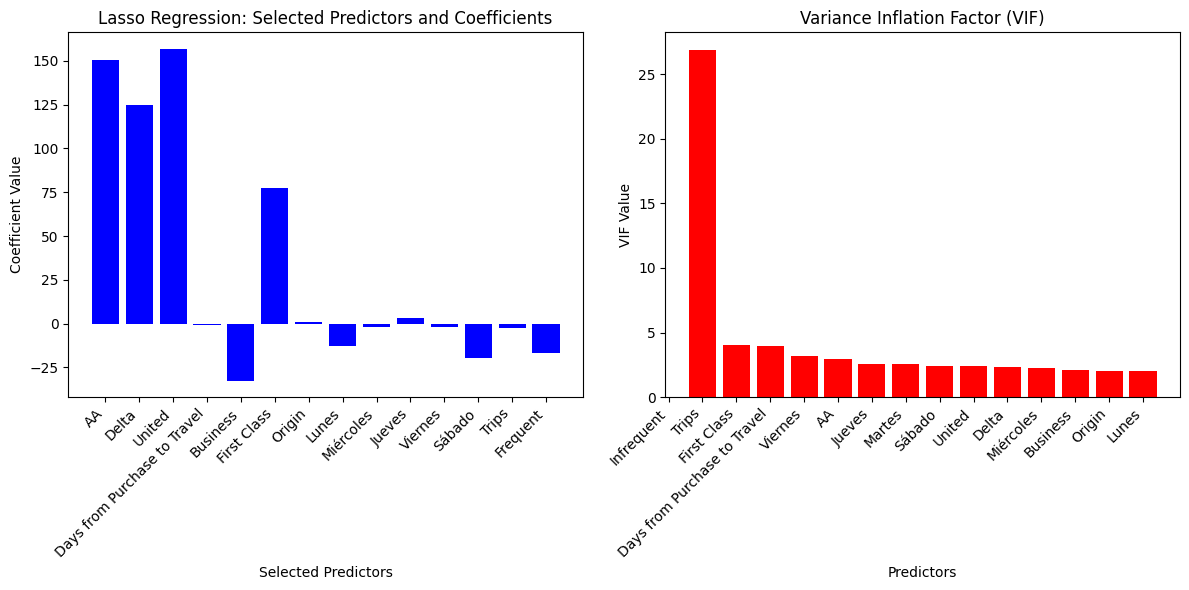

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import numpy as np

# Assuming your data is loaded into a DataFrame named 'df'

# Splitting the data
X = df.drop('Ticket Price', axis=1)
y = df['Ticket Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Lasso regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Get the selected predictors and their coefficients
lasso_coefficients = lasso_model.coef_
selected_predictors = X_train.columns[lasso_coefficients != 0]

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [VIF(X_train.values, i) for i in range(X_train.shape[1])]

# Sort VIF data by VIF values in descending order
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Create a bar plot for Lasso coefficients
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(selected_predictors, lasso_coefficients[lasso_coefficients != 0], color='blue')
plt.xlabel('Selected Predictors')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression: Selected Predictors and Coefficients')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Create a bar plot for VIF values
plt.subplot(1, 2, 2)
plt.bar(vif_data_sorted["Feature"], vif_data_sorted["VIF"], color='red')
plt.xlabel('Predictors')
plt.ylabel('VIF Value')
plt.title('Variance Inflation Factor (VIF)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize a dictionary to store R-squared values for each predictor
rsquared_dict = {}

# Iterate through each predictor
for predictor in X_train.columns:
    # Fit a linear regression model for the current predictor vs. Ticket Price
    lm = LinearRegression()
    lm.fit(X_train[[predictor]], y_train)

    # Calculate R-squared for the model
    r_squared = lm.score(X_train[[predictor]], y_train)

    # Store the R-squared value in the dictionary
    rsquared_dict[predictor] = r_squared

# Calculate the VIF for each predictor using VIF = 1 / (1 - R-squared)
vif_dict = {predictor: 1 / (1 - r_squared) for predictor, r_squared in rsquared_dict.items()}

# Convert the dictionary to a DataFrame and sort it by VIF values in descending order
vif_data = pd.DataFrame.from_dict(vif_dict, orient='index', columns=['VIF'])
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Print the sorted VIF values
print(vif_data_sorted)


                                   VIF
AA                            1.089776
United                        1.075484
Trips                         1.071103
Days from Purchase to Travel  1.055886
Type of Traveler_Extreme      1.054038
Extreme                       1.054038
Business                      1.033500
Type of Traveler_Frequent     1.020528
Frequent                      1.020528
First Class                   1.013492
Miércoles                     1.010961
Martes                        1.008062
Viernes                       1.006877
Delta                         1.004167
Sábado                        1.003855
Origin                        1.002521
Lunes                         1.002337
Jueves                        1.001570
Infrequent                    1.000903
Type of Traveler_Infrequent   1.000903


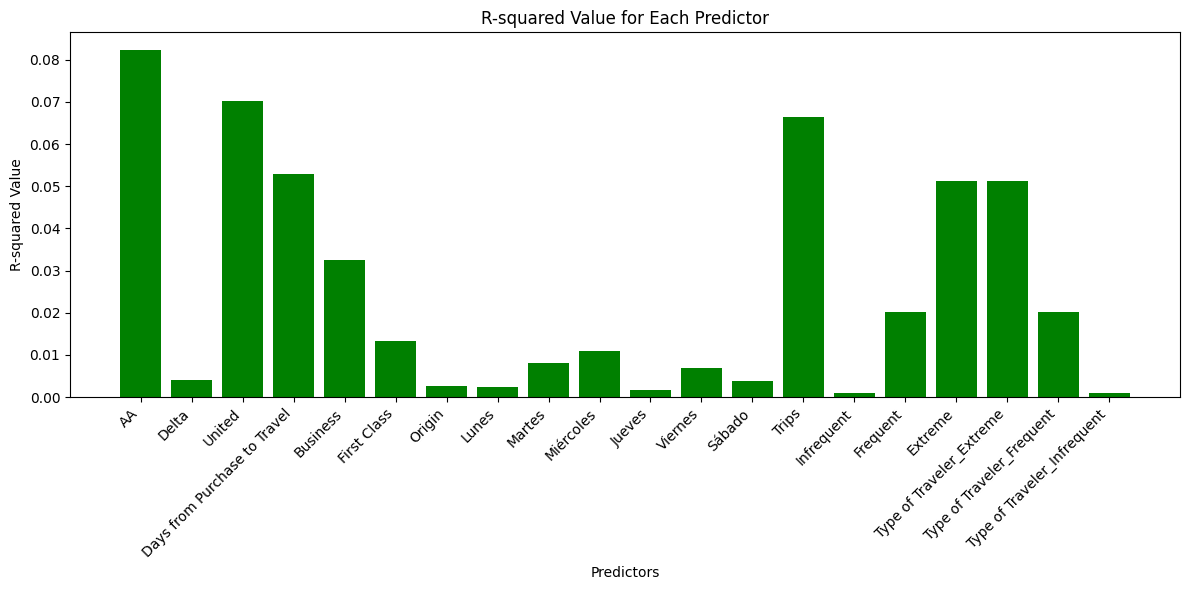

In [ ]:
import matplotlib.pyplot as plt

# Plot R-squared values for each predictor
plt.figure(figsize=(12, 6))
plt.bar(rsquared_dict.keys(), rsquared_dict.values(), color='green')
plt.xlabel('Predictors')
plt.ylabel('R-squared Value')
plt.title('R-squared Value for Each Predictor')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


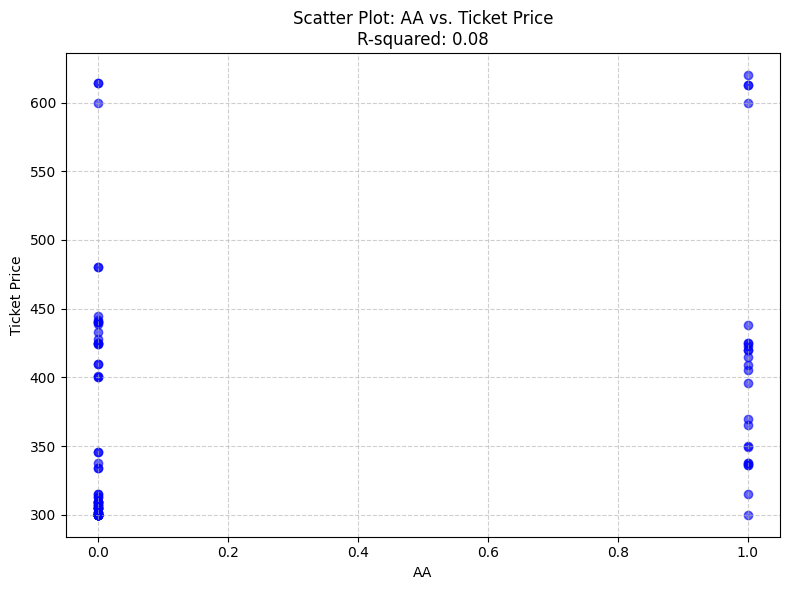

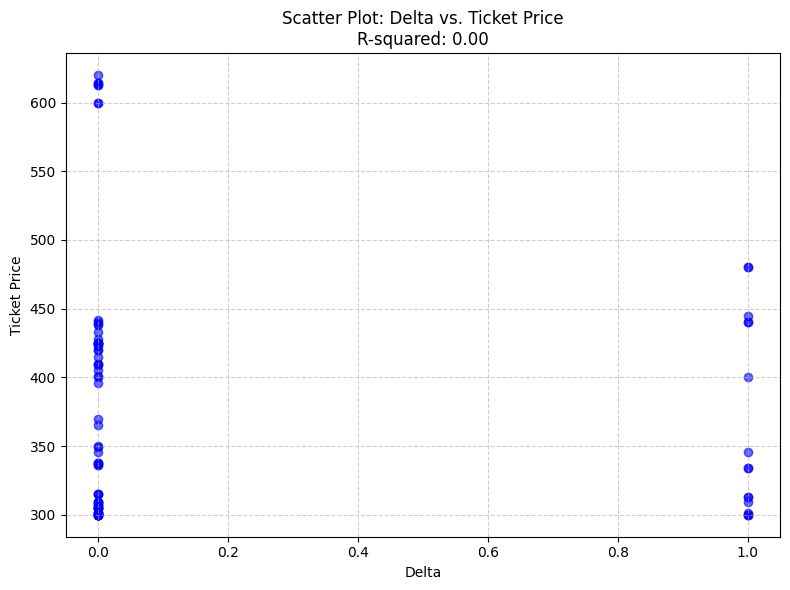

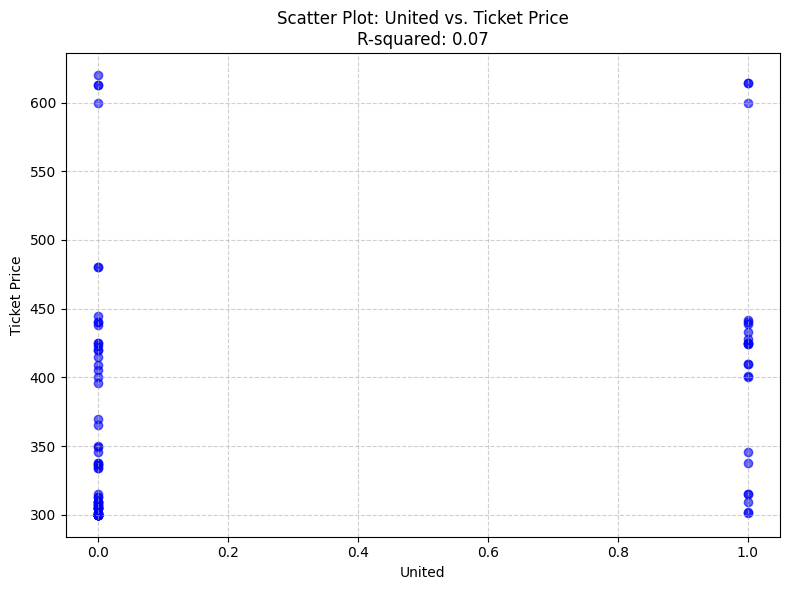

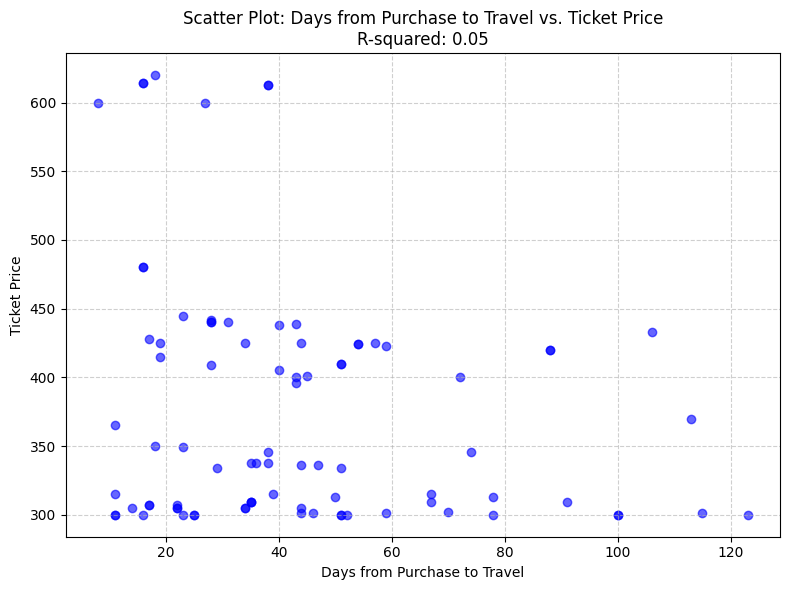

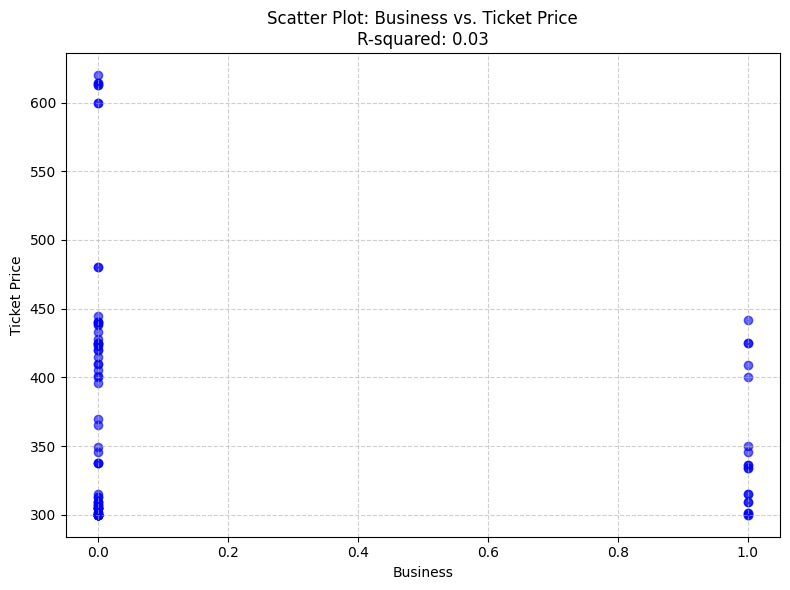

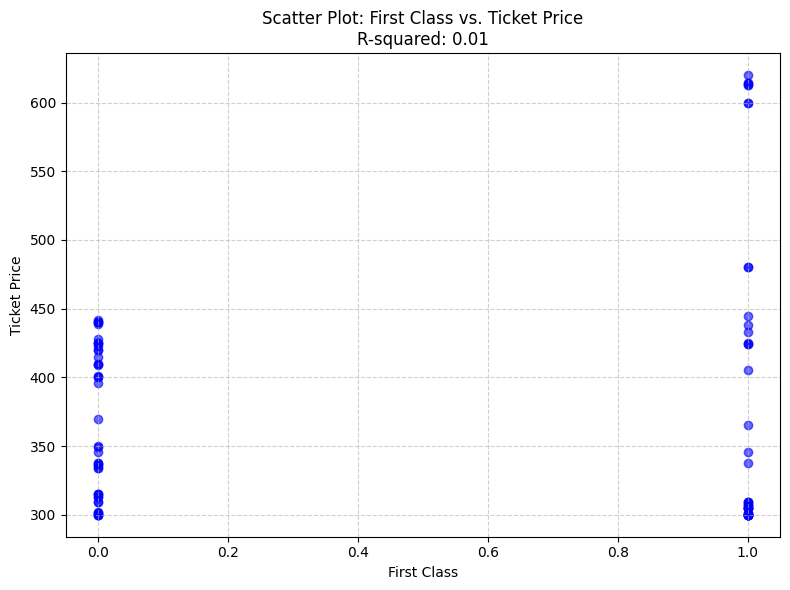

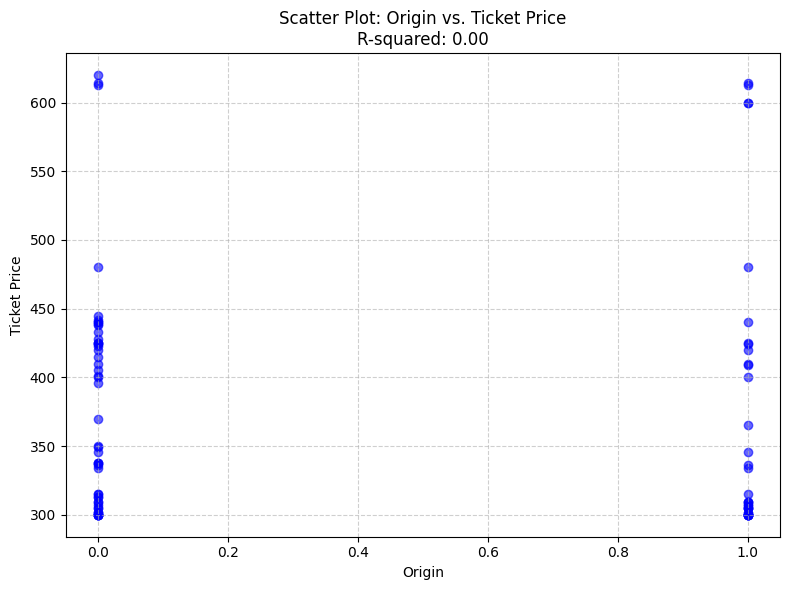

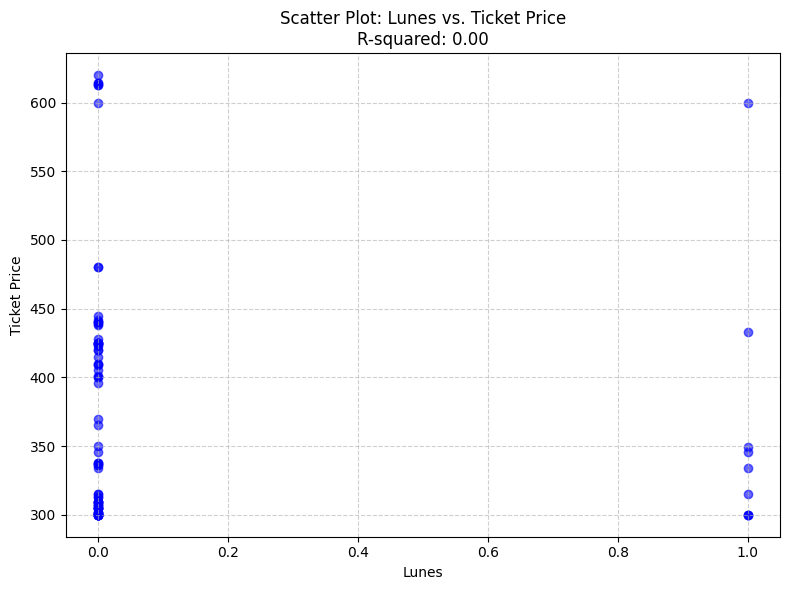

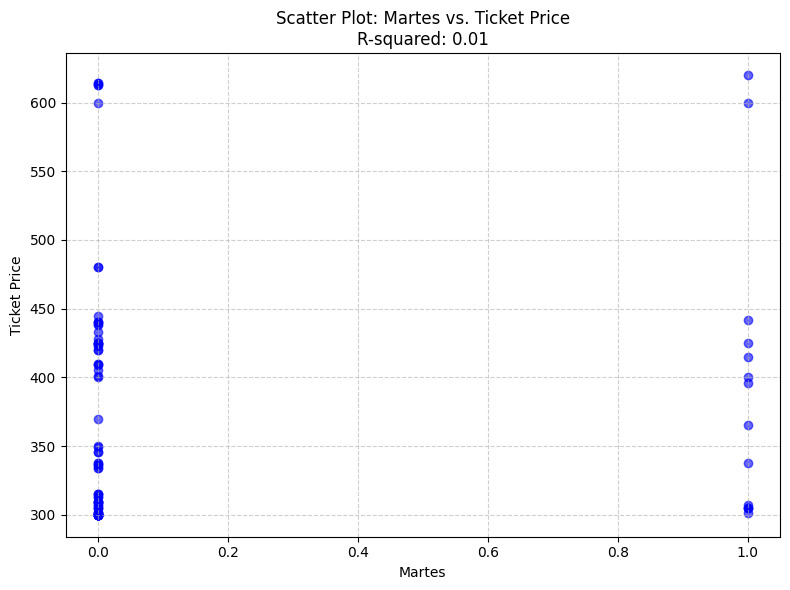

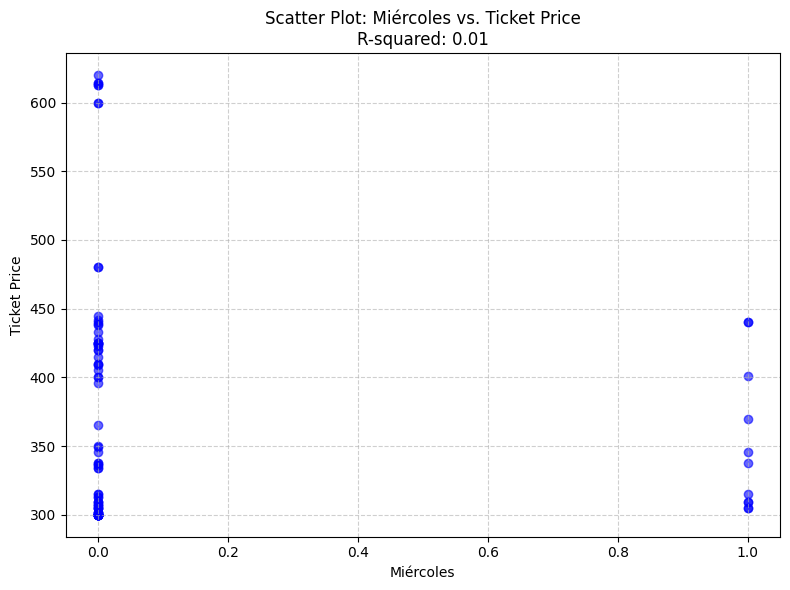

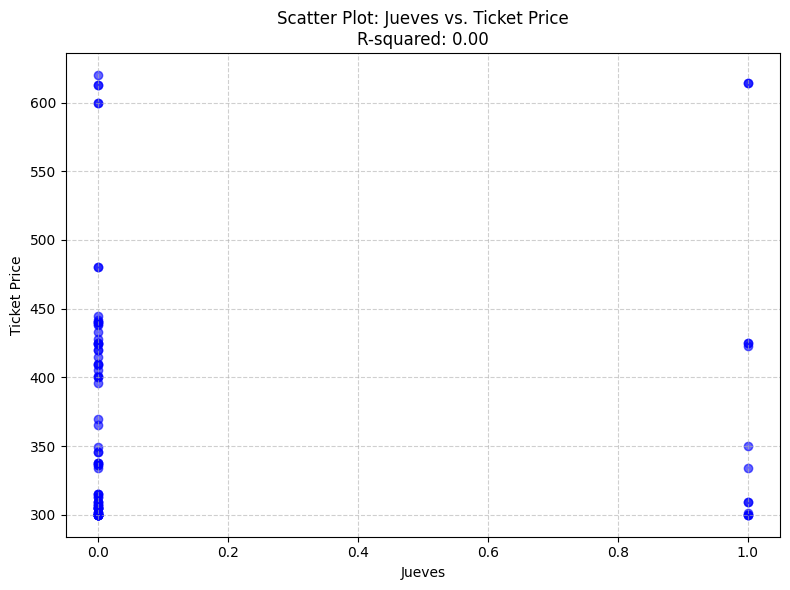

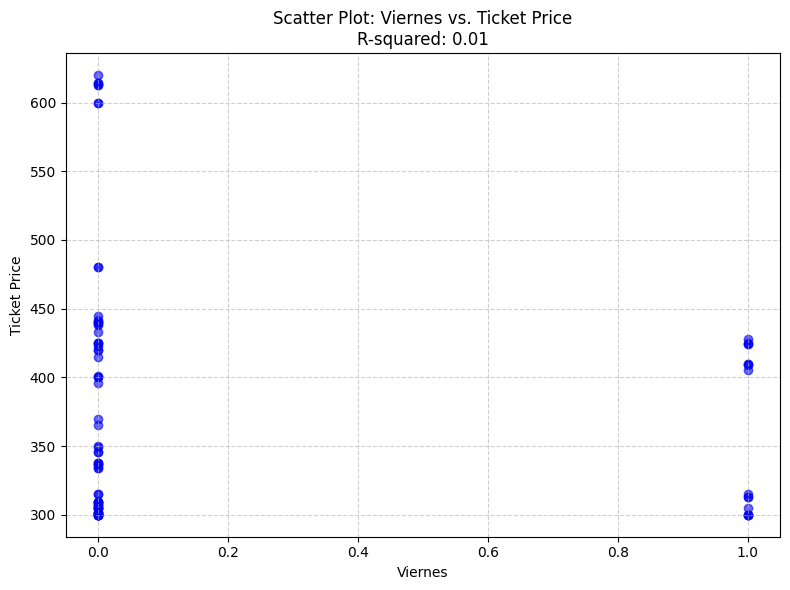

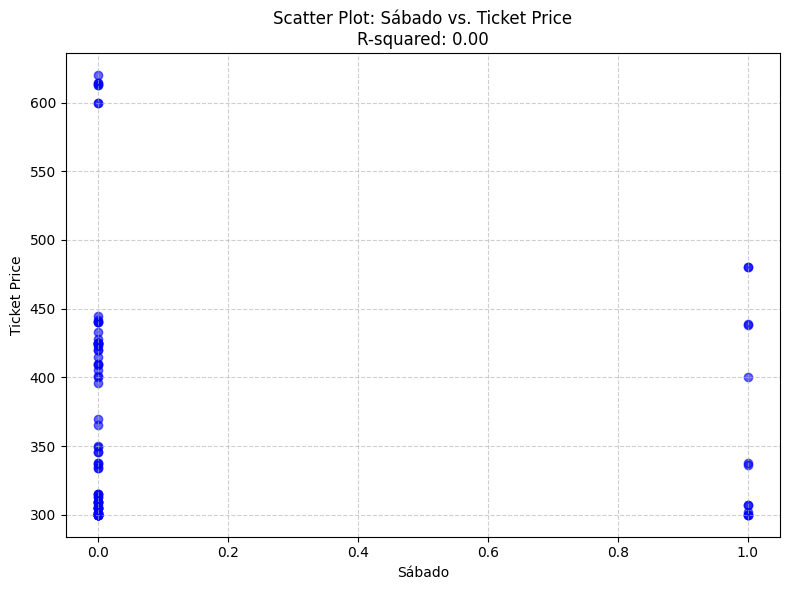

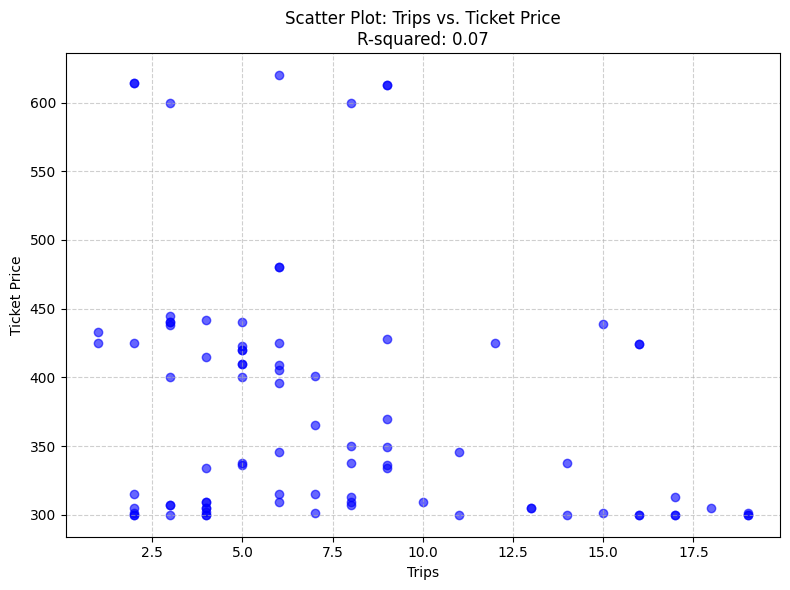

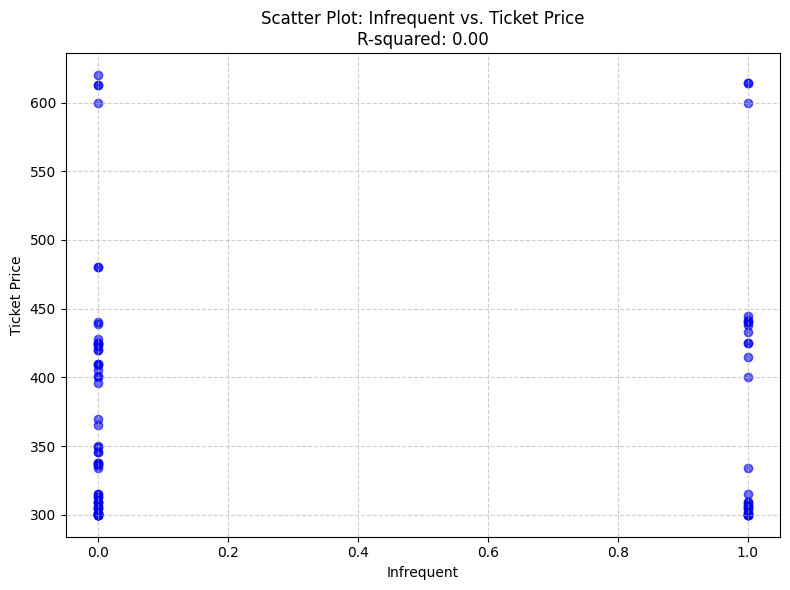

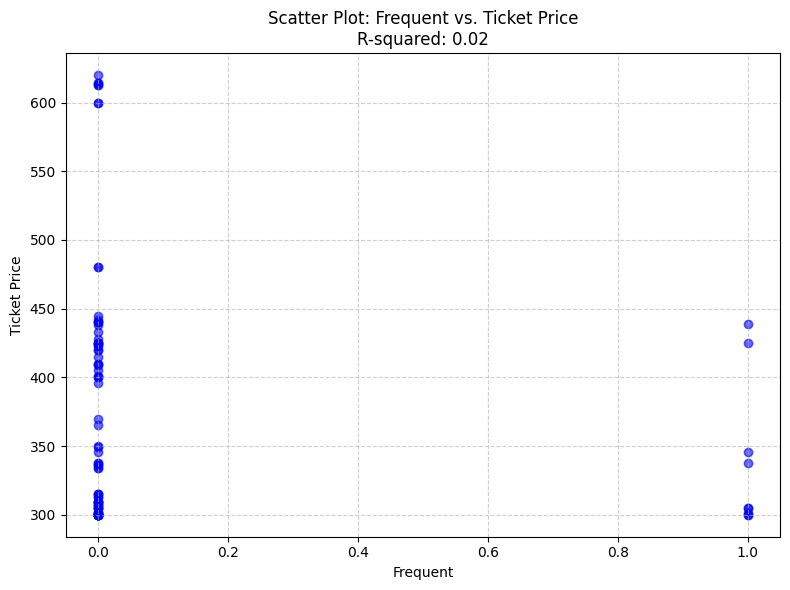

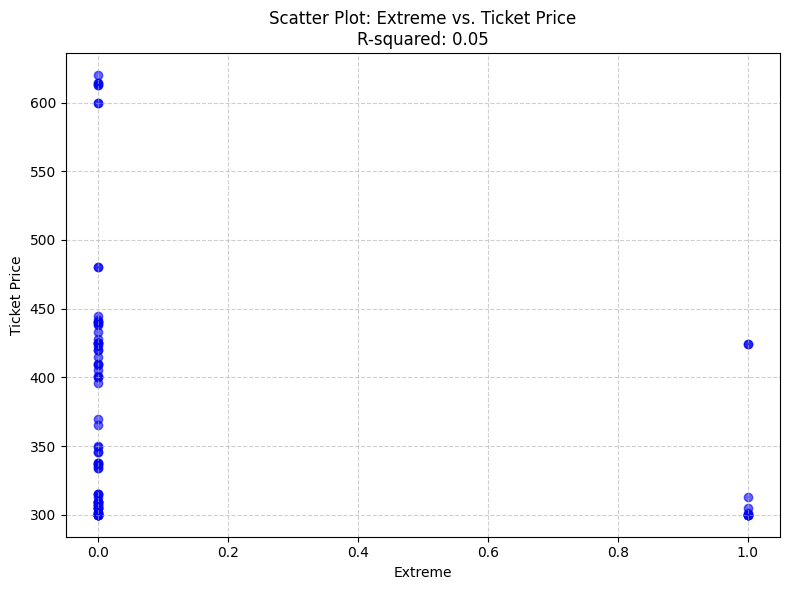

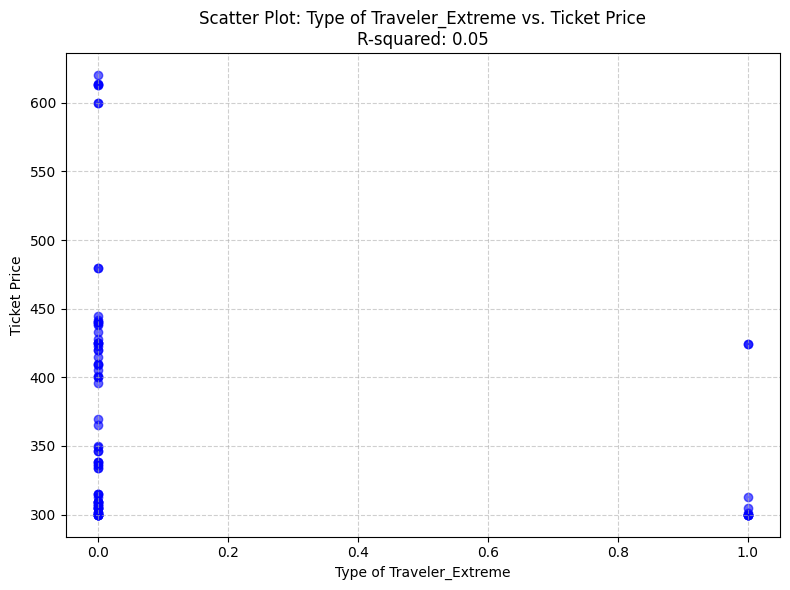

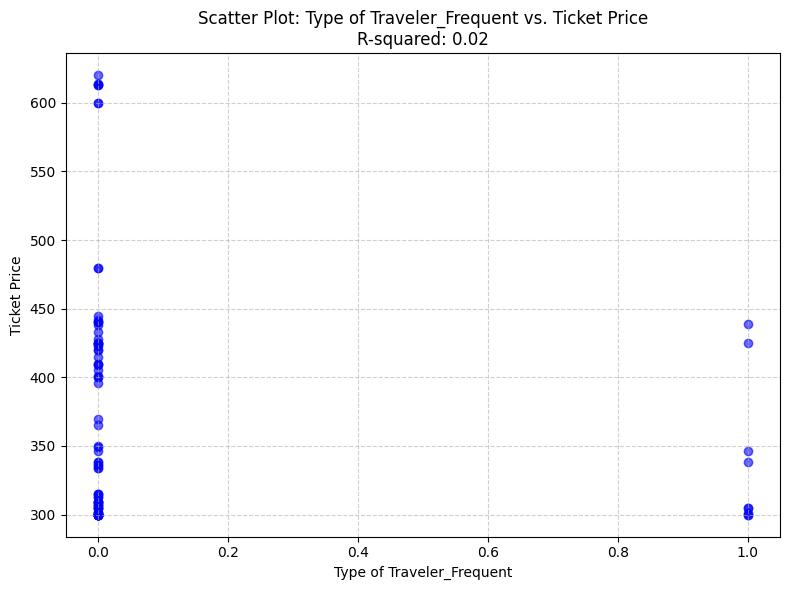

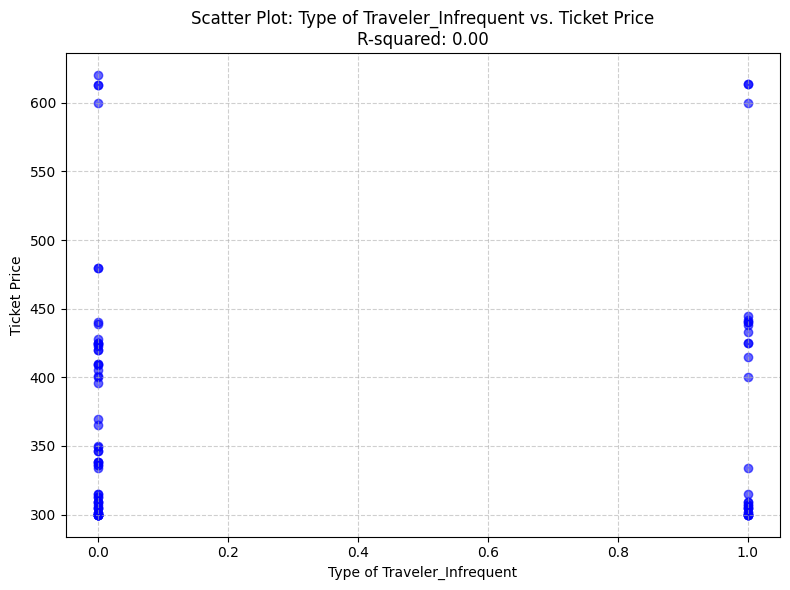

In [ ]:
import matplotlib.pyplot as plt

# Iterate through each predictor
for predictor in X_train.columns:
    # Fit a linear regression model for the current predictor vs. Ticket Price
    lm = LinearRegression()
    lm.fit(X_train[[predictor]], y_train)

    # Calculate R-squared for the model
    r_squared = lm.score(X_train[[predictor]], y_train)

    # Create a scatter plot for the current predictor vs. Ticket Price
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[predictor], y_train, color='blue', alpha=0.6)
    plt.xlabel(predictor)
    plt.ylabel('Ticket Price')
    plt.title(f'Scatter Plot: {predictor} vs. Ticket Price\nR-squared: {r_squared:.2f}')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



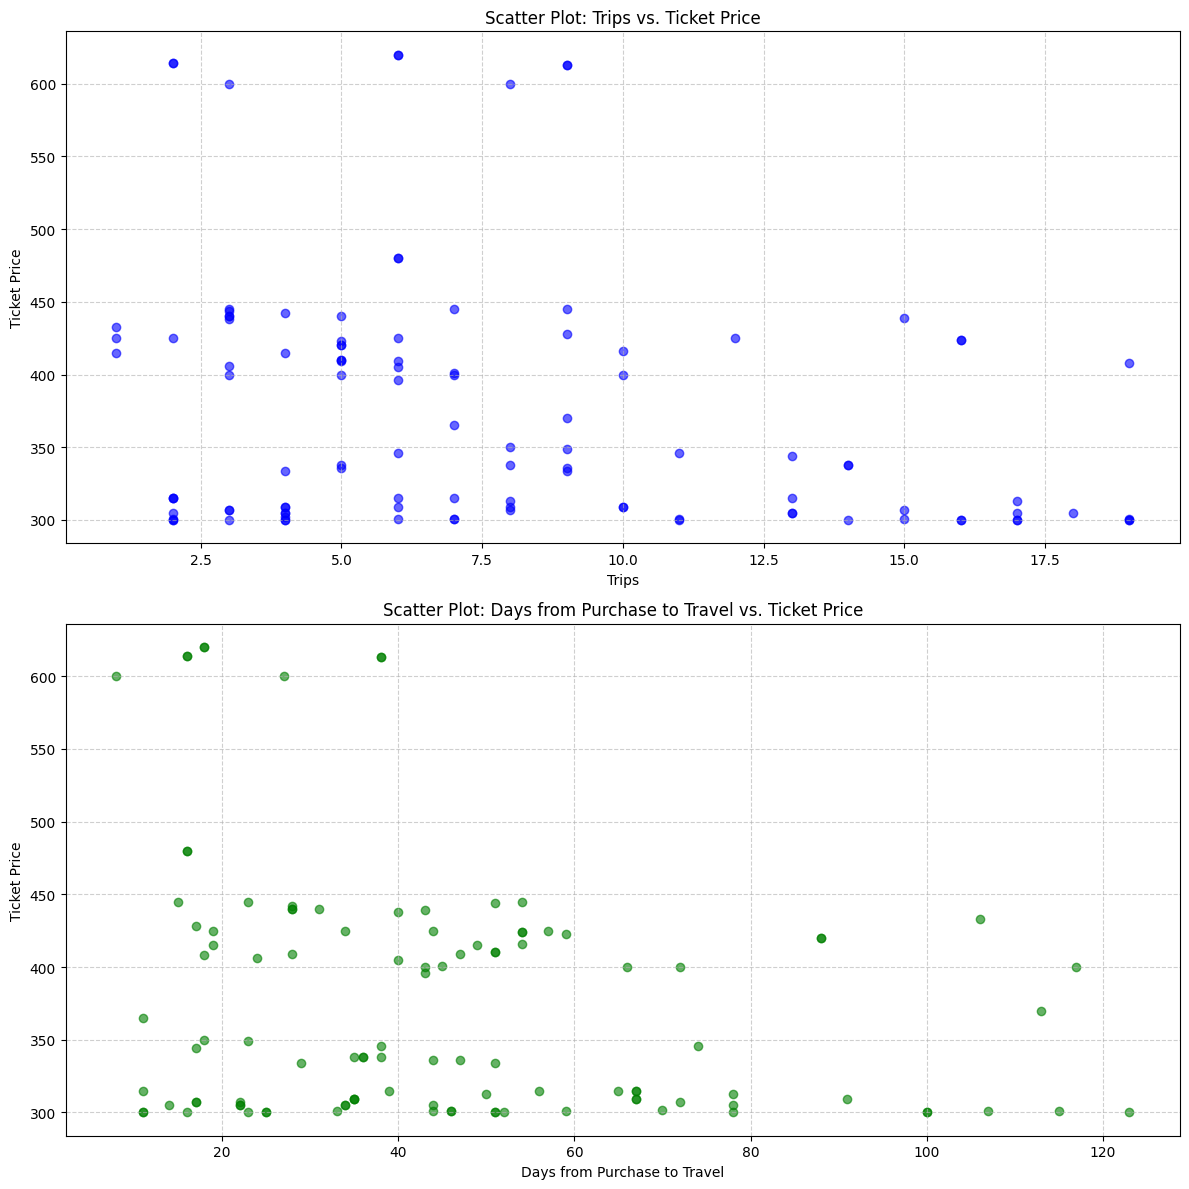

In [ ]:
# Create a 2x1 subplot for two separate scatter plots
plt.figure(figsize=(12, 12))

# Scatter plot 1: Trips vs. Ticket Price
plt.subplot(2, 1, 1)
plt.scatter(df['Trips'], df['Ticket Price'], color='blue', alpha=0.6)
plt.xlabel('Trips')
plt.ylabel('Ticket Price')
plt.title('Scatter Plot: Trips vs. Ticket Price')
plt.grid(True, linestyle='--', alpha=0.6)

# Scatter plot 2: Days from Purchase to Travel vs. Ticket Price
plt.subplot(2, 1, 2)
plt.scatter(df['Days from Purchase to Travel'], df['Ticket Price'], color='green', alpha=0.6)
plt.xlabel('Days from Purchase to Travel')
plt.ylabel('Ticket Price')
plt.title('Scatter Plot: Days from Purchase to Travel vs. Ticket Price')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


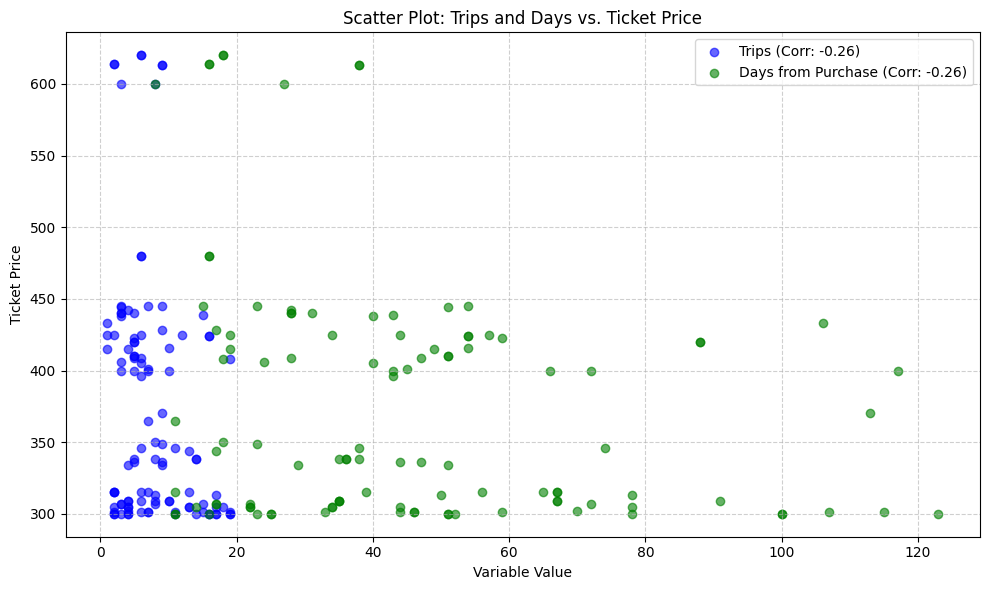

In [ ]:
import numpy as np

# Calculate correlation coefficients
correlation_trips = np.corrcoef(df['Trips'], df['Ticket Price'])[0, 1]
correlation_days = np.corrcoef(df['Days from Purchase to Travel'], df['Ticket Price'])[0, 1]

# Create a scatter plot with both variables on the same scale
plt.figure(figsize=(10, 6))
plt.scatter(df['Trips'], df['Ticket Price'], color='blue', alpha=0.6, label=f'Trips (Corr: {correlation_trips:.2f})')
plt.scatter(df['Days from Purchase to Travel'], df['Ticket Price'], color='green', alpha=0.6, label=f'Days from Purchase (Corr: {correlation_days:.2f})')
plt.xlabel('Variable Value')
plt.ylabel('Ticket Price')
plt.title('Scatter Plot: Trips and Days vs. Ticket Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


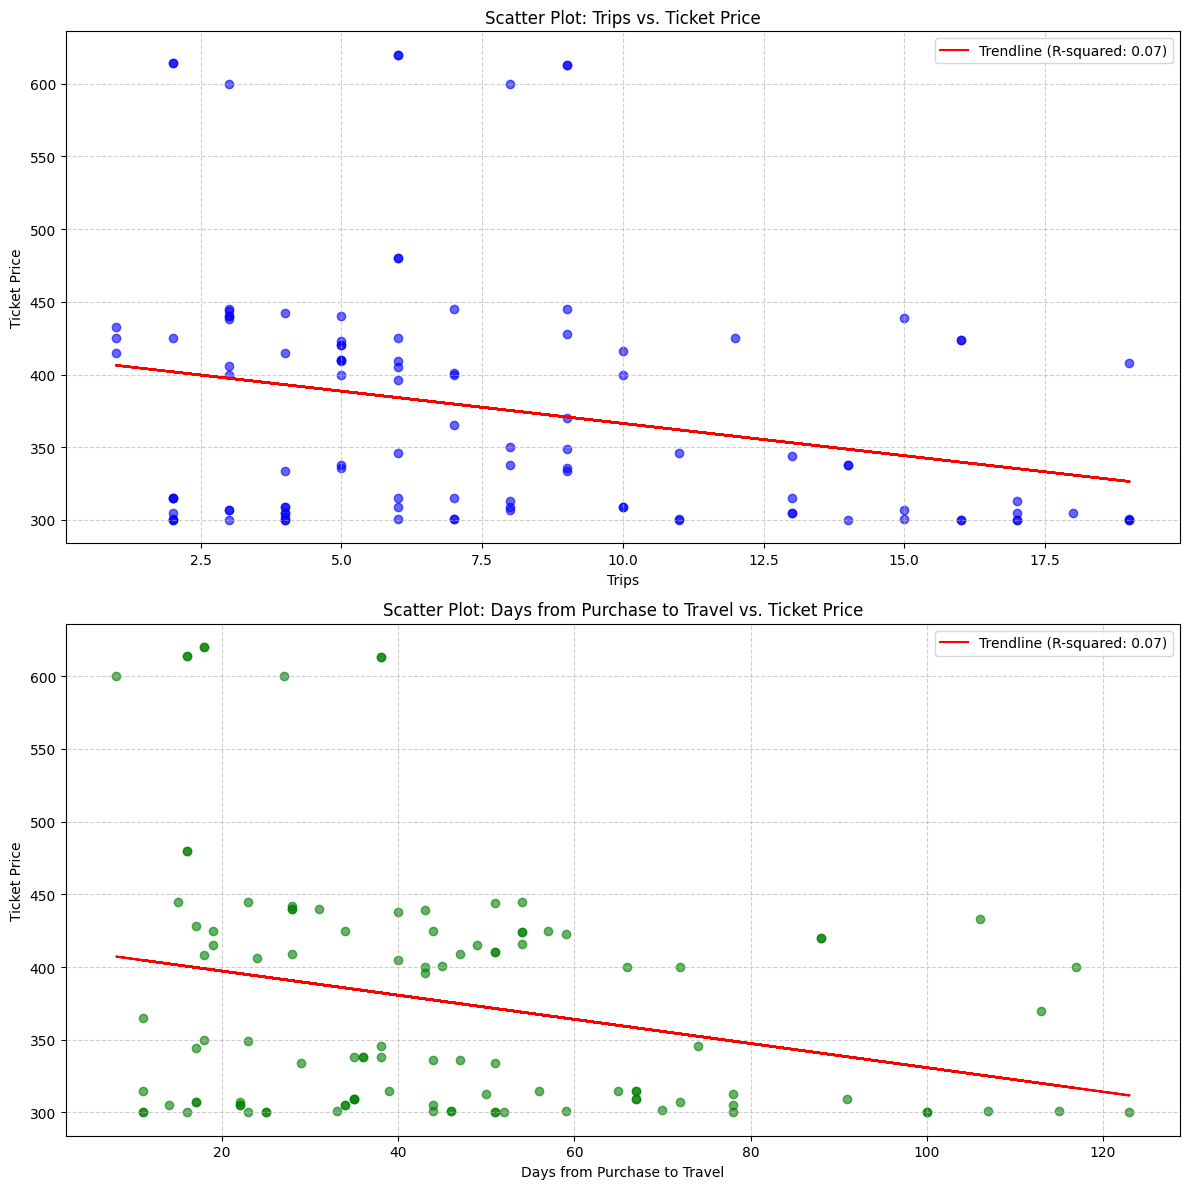

In [ ]:
from scipy import stats

# Create a 2x1 subplot for two separate scatter plots
plt.figure(figsize=(12, 12))

# Scatter plot 1: Trips vs. Ticket Price
plt.subplot(2, 1, 1)
plt.scatter(df['Trips'], df['Ticket Price'], color='blue', alpha=0.6)
plt.xlabel('Trips')
plt.ylabel('Ticket Price')
plt.title('Scatter Plot: Trips vs. Ticket Price')

# Calculate the trendline and R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Trips'], df['Ticket Price'])
plt.plot(df['Trips'], intercept + slope * df['Trips'], color='red', label=f'Trendline (R-squared: {r_value**2:.2f})')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Scatter plot 2: Days from Purchase to Travel vs. Ticket Price
plt.subplot(2, 1, 2)
plt.scatter(df['Days from Purchase to Travel'], df['Ticket Price'], color='green', alpha=0.6)
plt.xlabel('Days from Purchase to Travel')
plt.ylabel('Ticket Price')
plt.title('Scatter Plot: Days from Purchase to Travel vs. Ticket Price')

# Calculate the trendline and R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Days from Purchase to Travel'], df['Ticket Price'])
plt.plot(df['Days from Purchase to Travel'], intercept + slope * df['Days from Purchase to Travel'], color='red', label=f'Trendline (R-squared: {r_value**2:.2f})')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with the predictors for comparison
comparison_df = df[['Trips', 'Days from Purchase to Travel']]

# 1. Calculate the VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = comparison_df.columns
vif_data["VIF"] = [variance_inflation_factor(comparison_df.values, i) for i in range(comparison_df.shape[1])]

# 2. Check for multicollinearity using VIF
threshold_vif = 5  # You can adjust this threshold as needed
multicollinear_predictors = vif_data[vif_data["VIF"] > threshold_vif]["Feature"]

# Display the VIF values and multicollinear predictors
print("VIF Values:")
print(vif_data)
print("\nMulticollinear Predictors:")
print(multicollinear_predictors)

# 3. Conduct statistical tests for heteroscedasticity (e.g., Breusch-Pagan Test)
# Assuming you have already defined X and y:
X = sm.add_constant(comparison_df)
model = sm.OLS(df['Ticket Price'], X).fit()
bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, X)
print("\nBreusch-Pagan Test p-value:", bp_test[1])

# Create scatter plots with trendlines and R-squared values (as shown in your code)
# ...

# Continue with additional analysis as needed.


VIF Values:
                        Feature       VIF
0                         Trips  2.472233
1  Days from Purchase to Travel  2.472233

Multicollinear Predictors:
Series([], Name: Feature, dtype: object)

Breusch-Pagan Test p-value: 0.005155778144962858
